# BUSINESS UNDERSTANDING

1. Business Background
2. Business Operations
3. Problem Statement
4. Questions to Answer
5. Success Criteria
6. Stakeholders

---

## Business Background

The film industry is an industry that deals with the creation, production and showing of films or movies, which involves different personnel. It is ever-growing from traditional studios, streaming platforms, and independent filmmakers.

It is characterized by:

- High upfront investment with uncertain returns.
- Global and local market reach.
- Revenue from multiple channels, including:
- Box office ticket sales
- Streaming
- DVD/Blu-ray sales

Our company here has traditionally operated outside the entertainment industry but is looking to enter the film industry by launching its own movie studio.

---

## Business Operations

- **Film Production**: Developing, directing, and producing films from script to screen.
- **Budget Allocation**: Deciding how much to invest in different genres or types of movies.
- **Marketing and Distribution**: Planning the timing, channels, and regions for movie releases.
- **Revenue Monitoring**: Tracking earnings through ticket sales (box office performance).
- **Strategic Decision Making**: Determining what types of films to invest in, based on available data.

---

## Business Problem Statement

What types of films based on genre, budget, release timing, and other production characteristics should the company invest in to maximize box office success and minimize financial risk as it launches its new movie studio?

---

## Business Questions (To Answer)

1. Which genres generate the highest revenue?
2. What is the ideal budget range for a financially successful film?
3. What release months or seasons correlate with higher box office returns?
4. Do sequels outperform original films?
5. Which directors, actors, or production companies are associated with high-performing films?
6. Does movie rating (PG, PG-13, R) affect financial performance?
7. How do critical scores (IMDB, Rotten Tomatoes) relate to box office success?
8. Are there geographical patterns in box office success (domestic vs international)?

---

## Business Success Criteria

1. Strong Box Office Performance
2. Market Penetration & Audience Reach - Films should perform well across domestic and international markets
3. Brand Recognition
4. Consistently producing quality, successful content (either be high expenditure or low)
5. Having different revenue Streams beyond box office earnings, the studio should generate revenue from:
    - Streaming rights
    - Merchandising
    - Licensing and syndication
    - Home media (DVD sales)
6. Films should receive favorable reviews and ratings on platforms like IMDb, Rotten Tomatoes, and Metacritic.
7. Awards and Industry Recognition

---

## Stakeholders

1. Studio executive - Primary decision maker
2. Marketing team - Plan on promotions and time for release
3. Finance team - Budget planning
4. Production team - Content creation
5. Data analyst - Provide insights to the business


# DATA UNDERSTANDING
In this section, we are going introduce ourselves to the data we are going to use, exploring them for insights and understanding before we begin our analysis. This section will include data description and summary to know what we are getting into.

In this repository, under the file path `data/raw/zippedData`, we have 6 zipped datasets namely `im.db`, `bom.movie_gross.csv`, `tn.movie_budgets.csv`, `rt.reviews.tsv`, `rt.movie_info.tsv`, and `tmdb.movies.csv`.
We are going to explore them one by one focusing on their sources, structures, formats, why they are suitable and if they are in the best shape for analysis.

The analysis tools we will be using in this project include;
- Pandas

- SQLite3

- Numpy

- Seaborn

- Matplotlib

In [103]:
# Importing the necessary libraries for analysis.

import pandas as pd
import numpy as np
import sqlite3
import string as str
import seaborn as sns
import matplotlib.pyplot as plt

## rt.reviews.tsv
### Data source
The `rt.reviews.tsv.gz` dataset is sourced from the Rotten Tomatoes website, a film and television review aggregator and user community. The data contains movie reviews and ratings from various movie critics dating from the year 2000 to 2018.

### Why is the data suitable for the project?
* The data contains movie reviews, ratings, user comments, and critical reception, which help predict box office performance and overall success. This information also reveals audience preferences for genres, themes, and storylines, which is important to help studios tailor their content to meet market demand and avoid oversaturation in certain areas.

* User reviews and comments provide valuable insights into audience perceptions of specific films and the overall cinematic landscape. Most importantly, this information is crucial for attracting investors and making informed decisions about green-lighting projects.

In [104]:
# We are reading the data into the 'rt_reviews, variable using the .read_csv() pandas function to be able to access the data in form of a dataframe

rt_reviews = pd.read_csv("../../data/raw/zippedData/rt.reviews.tsv",sep= '\t', encoding= 'latin-1', index_col= False)
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [105]:
# This code will print out the shape and the data's columns.

print(f'The data has a {rt_reviews.shape} structure.')
print('`rt_reviews` has 8 columns namely:', rt_reviews.columns)

The data has a (54432, 8) structure.
`rt_reviews` has 8 columns namely: Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


In [106]:
# We will be using the .info() function to explore the data further.
# this function will show us the columns' datatypes, count of non null values, allowing us to identify columns with null values.

rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [108]:
# Other than the .info() function, .describe() function also gives a summary of the dataset.
# This function gives us the statistical summary of the data.

rt_reviews.describe(include= 'all')

,id,review,rating,fresh,critic,top_critic,publisher,date
count,54432.000000,48869,40915,54432,51710,54432.000000,54123,54432
unique,NaN,48682,186,2,3496,NaN,1281,5963
top,NaN,Parental Content Review,3/5,fresh,Emanuel Levy,NaN,eFilmCritic.com,"January 1, 2000"
freq,NaN,24,4327,33035,595,NaN,673,4303
mean,1045.706882,NaN,NaN,NaN,NaN,0.240594,NaN,NaN
std,586.657046,NaN,NaN,NaN,NaN,0.427448,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,542.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1083.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,1541.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [109]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = rt_reviews.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

rating       13517
review        5563
critic        2722
publisher      309
dtype: int64

In [110]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = rt_reviews.duplicated().sum()
duplicates

9

### Data summary
* The dataset contains structured data stored in a TSV (tab-separated values) file containing both non-categorical and categorical data. 

* The dataset contains data in 54432 rows and 8 columns namely, 'id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', and 'date'. All the columns are well labeled and easy to interpret.

* Out of the 8 columns, only 4 contain null values ranging from as low as 300 to 13,517 null values. The dataset also contains 9 duplicated rows.

* The dataset contains mostly object datatypes, hence there is no quantitative analysis needed.

### Data Quality Issues
- Incompleteness - 4 columns contain missing values. Missing values in data can lead to inaccuracies and misleading results, which subsequently leads to inaccurate insights.

- Duplicate records - The dataset contains 9 duplicated records, which could skew the results as certain records provide the same information twice.

### Next steps
The data is mostly clean and has a lot of information to offer, however, a few columns need some cleaning. The cleaning involves;

* Handle missing and duplicated records.

## rt.movies_info.tsv
### Data source
The `rt.movie_info.tsv` data is extracted from Rotten Tomatoes website and contains information about movies and television series including their genres, ratings, synopsis as well as the movie's director, writer, release date and run-time.

### Why is the data suitable for the project?
* This data allows us to analyze the impact of writers and directors on previous films' success providing valuable information for casting decisions. Additionally, real-time review data can track a film's performance after its release, allowing studios to adapt marketing strategies and address potential issues. 

* Comparing a film's performance against similar titles in terms of review scores and box office success allows studios to identify areas for improvement and best practices.


In [111]:
# We are reading the data into the 'rt_movies, variable using the .read_csv() pandas function to be able to access the data in form of a dataframe

rt_movies = pd.read_csv("../../data/raw/zippedData/rt.movie_info.tsv", sep= '\t', encoding= 'latin-1', index_col= False)
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [112]:
# This code will print out the shape and the data's columns.

print(f'The data has a {rt_movies.shape} structure.')
print('`rt_reviews` has 8 columns namely:', rt_movies.columns)

The data has a (1560, 12) structure.
`rt_reviews` has 8 columns namely: Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


In [113]:
# We will be using the .info() function to explore the data further.
# this function will show us the columns' datatypes, count of non null values, allowing us to identify columns with null values.

rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [114]:
# Other than the .info() function, .describe() function also gives a summary of the dataset.
# This function gives us the statistical summary of the data.

rt_movies.describe(include= 'all')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1560.000000,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,NaN,1497,6,299,1125,1069,1025,717,1,336,142,200
top,NaN,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"600,000",90 minutes,Universal Pictures
freq,NaN,2,521,151,10,4,8,11,340,2,72,35
mean,1007.303846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,579.164527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,504.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1007.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1503.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = rt_movies.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

currency        1220
box_office      1220
studio          1066
writer           449
theater_date     359
dvd_date         359
director         199
synopsis          62
runtime           30
genre              8
rating             3
dtype: int64

In [116]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = rt_movies.duplicated().sum()
duplicates

0

### Data summary
*  The dataset contains structured data stored in a TSV file containing both numerical and categorical data.

* The dataset contains data in 1560 rows and 12 columns namely, 'id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime' and 'studio'. All the columns are well labeled and easy to interpret.

* Out of the 12 columns, 11 contain null values ranging from as low as 3 to 1220 null values. The dataset also contains 0 duplicated rows.

* The dataset contains object datatypes, hence there is no quantitative analysis needed.

### Data Quality Issues
- Incompleteness - 11 columns contain missing values. Missing values in data can lead to inaccuracies and misleading results, which subsequently leads to inaccurate insights.

- Inaccuracy - Several columns are in the wrong data types, hence resulting in inaccurate data. inaccurate information can cause significant problems with severe consequences. 

### Next steps
The data is mostly clean and has a lot of information to offer, however, a few columns need some cleaning. The cleaning involves;

* Handle missing.

* Data type conversion.

## tmdb.movies.csv
### Data source
The `tmdb.movies.csv` data is extracted from TheMovieDB, a community built movie and TV database. It contains information on the popularity, genres and movie ratings.

### Why the data is suitable for the project
* This dataset is suitable for the project because it allows analysis of past movie performance data, including audience ratings, and box office numbers, to create models that predict the potential success of upcoming films. Also, community reviews and ratings reveal audience tastes and preferences, which can help studios tailor their content to appeal to specific demographics and genres. 

* By understanding audience preferences and geographical trends, studios can tailor their distribution strategies, including release dates, theater selection, and marketing efforts. It facilitates collaboration between stakeholders by providing a shared platform for accessing information and discussing potential projects. 

* The database provides a wealth of data for market research, allowing studios to understand trends, competitor activities, and potential opportunities.

In [117]:
# We are reading the data into the 'tmdb_movies' variable using the .read_csv() pandas function to be able to access the data in form of a dataframe

tmdb_movies = pd.read_csv("../../data/raw/zippedData/tmdb.movies.csv", sep= ',', encoding= 'latin-1', index_col= False)
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [118]:
# This code will print out the shape and the data's columns.

print(f'The data has a {tmdb_movies.shape} structure.')
print('`tmdb_movies` has 10 columns namely:', tmdb_movies.columns)

The data has a (26517, 10) structure.
`tmdb_movies` has 10 columns namely: Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


In [119]:
# We will be using the .info() function to explore the data further.
# this function will show us the columns' datatypes, count of non null values, allowing us to identify columns with null values.

tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [120]:
# Other than the .info() function, .describe() function also gives a summary of the dataset.
# This function gives us the statistical summary of the data.

tmdb_movies.describe(include= 'all')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
count,26517.00000,26517,26517.000000,26517,26517,26517.000000,26517,26517,26517.000000,26517.000000
unique,NaN,2477,NaN,76,24835,NaN,3433,24688,NaN,NaN
top,NaN,[99],NaN,en,Eden,NaN,2010-01-01,Eden,NaN,NaN
freq,NaN,3700,NaN,23291,7,NaN,269,7,NaN,NaN
mean,13258.00000,NaN,295050.153260,NaN,NaN,3.130912,NaN,NaN,5.991281,194.224837
std,7654.94288,NaN,153661.615648,NaN,NaN,4.355229,NaN,NaN,1.852946,960.961095
min,0.00000,NaN,27.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000
25%,6629.00000,NaN,157851.000000,NaN,NaN,0.600000,NaN,NaN,5.000000,2.000000
50%,13258.00000,NaN,309581.000000,NaN,NaN,1.374000,NaN,NaN,6.000000,5.000000
75%,19887.00000,NaN,419542.000000,NaN,NaN,3.694000,NaN,NaN,7.000000,28.000000


In [121]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = tmdb_movies.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [122]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = tmdb_movies.duplicated().sum()
duplicates

0

### Data summary
* The data is stored in a CSV file containing both non-categorical and categorical data.

* The dataset has 26517 rows and 9 columns namely, 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', and 'vote_count'.

* It has no duplicate records and also no missing records.

### Data Quality
The dataset is mostly clean, with no apparent issues.

## tn.movie_budget.csv
### Data source
The `tn.movie_budgets.csv` dataset is extracted from 'The Numbers' box office revenue tracking website. The data contains the production budget, domestic gross as well as international gross of movies, providing a performance analysis of the movies since their release dates.

### Why the data is suitable for the project
* Data from a film revenue tracker website is crucial for movie studio stakeholders as it provides insights into a film's financial performance, helping with decision-making and planning throughout the film production process. This data enables better investment decisions, more effective marketing strategies, and improved content planning. 

* Analyzing past performance data, including box office sales, streaming numbers, and merchandise sales, allows studios to predict the potential profitability of upcoming films. This helps in securing investment and making informed decisions about production budgets and marketing campaigns. 

* Revenue trackers provide a clear picture of the financial risks and potential rewards associated with different film projects, allowing studios to allocate resources more effectively.

In [123]:
# We are reading the data into the 'movie_budgets' variable using the .read_csv() pandas function to be able to access the data in form of a dataframe

movie_budgets = pd.read_csv("../../data/raw/zippedData/tn.movie_budgets.csv", sep= ',', encoding= 'latin-1', index_col= False)
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [124]:
# This code will print out the shape and the data's columns.

print(f'The data has a {movie_budgets.shape} structure.')
print('`movie_budgets` has 6 columns namely:', movie_budgets.columns)

The data has a (5782, 6) structure.
`movie_budgets` has 6 columns namely: Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [125]:
# We will be using the .info() function to explore the data further.
# this function will show us the columns' datatypes, count of non null values, allowing us to identify columns with null values.

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [126]:
# Other than the .info() function, .describe() function also gives a summary of the dataset.
# This function gives us the statistical summary of the data.

movie_budgets.describe(include= 'all')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN


In [127]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = movie_budgets.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [128]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = movie_budgets.duplicated().sum()
duplicates

0

### Data summary
* The dataset contains structured data stored in a CSV file containing numerical data.

* The file contains 5782 rows and 6 columns namely, 'id', 'release_date', 'movie', 'production_budget', 'domestic_gross', and 'worldwide_gross' all well labeled and interpretable.

* According to the data, the most recent movie is Moonfall which was produced on 2020-12-31, while the oldest movie to be produced is The Birth of a Nation produced on 1915-02-08.

* The  movie with the highest production budget is Avatar With a budget allocation of $425,000,000, whereas My Date With Drew had the lowest budget standing at $1100

* The movie with the highest domestic income was Star Wars Ep. VII: The Force Awakens with an average amount of $760,507,625. The film with the highest worldwide gross was Avatar with an estimated return of $2,776,345,279.

### Data quality issues
- Inaccuracies

### Next steps
As noted from the dataset, columns' datatypes need to be formated as follows: 

 1. release_date needs to be formated into a date time object 

 2. production_budget needs to be formated into an int object and the dollar signs and commas removed

 3. domestic_gross needs to be formated into an int object and the dollar signs and commas removed
 
 4. worldwide_gross needs to be formated into and int object and the dollar signs and commas removed

## bom.movie_gross
### Data source
The `bom.movie_gross.csv` dataset is sourced from the 'Box Office Mojo' (BOM) reporting and analysis service website. The dataset contains systematic and algorithmic domestic and international box office revenues.

### Why the data is suitable for the project
* Analyzing gross data can help studios identify areas where they can streamline processes and optimize resource allocation. For example, data on production costs, marketing expenses, and distribution channels can be used to identify opportunities for cost savings and efficiency improvements. 

* By monitoring the returns on different film projects, studios can track their overall profitability and make adjustments to their production and marketing strategies as needed. 

* Data from revenue trackers allows studios to compare their performance against that of other films and companies, providing insights into their competitive standing and areas for improvement.

* The data empowers stakeholders to make better decisions, reduce risks, and optimize their chances of success in the competitive film industry. 

* By tracking the performance of different marketing channels and release strategies, studios can optimize their efforts to maximize reach and revenue. 

In [129]:
# We are reading the data into the 'movie_gross' variable using the .read_csv() pandas function to be able to access the data in form of a dataframe

movie_gross = pd.read_csv("../../data/raw/zippedData/bom.movie_gross.csv", sep= ',', encoding= 'latin-1', index_col= False)
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [130]:
# This code will print out the shape and the data's columns.

print(f'The data has a {movie_gross.shape} structure.')
print('`movie_gross` has 5 columns namely:', movie_gross.columns)

The data has a (3387, 5) structure.
`movie_gross` has 5 columns namely: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [131]:
# We will be using the .info() function to explore the data further.
# this function will show us the columns' datatypes, count of non null values, allowing us to identify columns with null values.

movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [132]:
# Other than the .info() function, .describe() function also gives a summary of the dataset.
# This function gives us the statistical summary of the data.

movie_gross.describe(include= 'all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [133]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = movie_gross.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

foreign_gross     1350
domestic_gross      28
studio               5
dtype: int64

In [134]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = movie_gross.duplicated().sum()
duplicates

0

### Data summary
* The dataset contains structured data stored in a CSV file containing numerical and non_categorical data.

* The file contains 3387 rows and 5 columns namely, 'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year' all well labeled and interpretable.

* Out of the 5 columns, 3 contain null values and the numerical values are stored as objects.

### Data quality issues
- Incompleteness - 11 columns contain missing values. Missing values in data can lead to inaccuracies and misleading results, which subsequently leads to inaccurate insights.

- Inaccuracy - Several columns are in the wrong data types, hence resulting in inaccurate data. inaccurate information can cause significant problems with severe consequences. 

### Next steps
- Data cleaning

- Data conversion

## im.db database
### Data source
The `im.db` data is extracted from the 'Internet Movie Database' (IMDB). The database contains information relating to films, TV series, production crew and their biographies, as well as movie ratings.

### Why the data is suitable for the project
Data from a film database websites provide valuable insights for movie studio stakeholders, enabling them to make more informed decisions across various aspects of film production and distribution. This data helps with everything from identifying emerging trends and predicting box office success to guiding script development and optimizing marketing campaigns. 

* Historical data on previous films, including ratings, reviews, and box office performance, can be used to predict the potential success of new releases. Understanding which factors, such as actor popularity, director reputation, and genre trends, positively influence box office results. 

* Data can provide insights into audience preferences and expectations, which can help inform the development of compelling and engaging scripts. Studios can use data to identify successful narrative structures, character archetypes, and thematic elements that resonate with audiences. 

* Data can be used to target specific demographics and tailor marketing messages to resonate with different audience segments. Studios can also optimize showtime schedules and distribution strategies based on past performance data and predictions. 

* Studios can use data to personalize recommendations and create more engaging user experiences on their streaming platforms and websites. This can lead to increased user engagement and satisfaction, ultimately driving revenue

*  The database can help studios identify promising actors, directors, and other talent by tracking their past performances and reviews. 

In [ ]:
import zipfile
import os

def unziper(zip_path ,extract_dir):
    
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# Find the extracted .sqlite or .db file
    db_files = [f for f in os.listdir(extract_dir) if f.endswith(('.sqlite', '.db', ))]
    db_path = os.path.join(extract_dir, db_files[0])

unziper('../../data/raw/zippedData/im.db',)  

In [146]:
# Connecting the database and reading it into the `conn` variable 
conn = sqlite3.connect('../../im.db')

# In this code we are reading the tables into the table variable to get the lay of the database
table = pd.read_sql("""SELECT*
                      FROM sqlite_master""", conn)
table

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Then we are going to take a peek into the database's ERD, to understand how the tables relate to each other.

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)

In [151]:
query = "SELECT * FROM movie_basics;"
movie_basics = pd.read_sql(query,conn)

In [152]:
# This code queries the database to access the table
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [153]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

In [154]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = movie_basics.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

runtime_minutes    31739
genres              5408
original_title        21
dtype: int64

In [155]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = movie_basics.duplicated().sum()
duplicates

0

In [156]:
# This code queries the database to access the table

directors = pd.read_sql("""SELECT *
                           FROM directors""", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [157]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = directors.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [158]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = directors.duplicated().sum()
duplicates

127639

In [159]:
# This code queries the database to access the table

known_for = pd.read_sql("""SELECT *
                           FROM known_for""", conn)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [160]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = known_for.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [161]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = known_for.duplicated().sum()
duplicates

0

In [162]:
# This code queries the database to access the table

movie_akas = pd.read_sql("""SELECT *
                            FROM movie_akas""", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [163]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = movie_akas.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

attributes           316778
language             289988
types                163256
region                53293
is_original_title        25
dtype: int64

In [164]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = movie_akas.duplicated().sum()
duplicates

0

In [165]:
# This code queries the database to access the table

movie_ratings = pd.read_sql("""SELECT *
                               FROM movie_ratings""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [166]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = movie_ratings.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [167]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = movie_ratings.duplicated().sum()
duplicates

0

In [168]:
# This code queries the database to access the table

persons = pd.read_sql("""SELECT *
                         FROM persons""", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [169]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = persons.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

death_year            599865
birth_year            523912
primary_profession     51340
dtype: int64

In [170]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = persons.duplicated().sum()
duplicates

0

In [171]:
# This code queries the database to access the table

principals = pd.read_sql("""SELECT *
                            FROM principals""", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [172]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = principals.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

job           850502
characters    634826
dtype: int64

In [173]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = principals.duplicated().sum()
duplicates

0

In [174]:
# This code queries the database to access the table

writers = pd.read_sql("""SELECT *
                         FROM writers""", conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [175]:
#The info() function gives us a summary of the data, but to check missing values closely, we are using .isnull() function to look at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = writers.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [176]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = writers.duplicated().sum()
duplicates

77521

### Data summary
* The dataset contains structured data stored in a database containing 8 tables namely, 'movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', and 'writers'.

### Table exploration
1. `movie_basics` - This table contains general movie information. It contains 146144 rows and 6 columns. Out of the 6 columns, 3 contain null values.

2. `directors` - This table links movie directors and the movies they directed. The data is stored in 291174 rows and 2 columns. It also contains 127639 duplicate records.

3. `known_for` - This table links people in the film industry and the movies they are known for. It has records in 1638260 rows and 2 columns and has no null values and duplicate records.

4. `movie_akas` - This table has information on the different names of the movies worldwide. It has 331703 rows and 8 columns. 5 out of the 8 columns contain null values.

5. `movie_ratings` - This table has information on movie ratings and number of votes. It contains 73856 rows and 3 columns, and has no null values or duplicated records.

6. `persons` - This table contains the biographies of all persons in the film industry including actors and directors. It has 606648 rows and 5 columns. Ou of the 5 columns, 3 contain null values.

7. `principals` - This table contains information about the job categories of the individuals in the film categories and for some, the characters they have played in past movies. It stored data in 1028186 rows and 6 columns. It has null values in 2 columns and no duplicate records.

8. `writers` - This table links nmovie writers and the movies they wrote. It contains 255873 rows and 2 columns. It also has 77521 duplicated records.

### Data Quality Observations
Most tables have a clean schema with clear foreign key references. However, it contains incomplete data and duplicated records.
- Joins between tables like movie_basics, movie_ratings, and persons are feasible and useful for analysis.

### Next Steps / Ideas for Deeper Analysis
* Join movie_basics with movie_ratings to find top-rated movies.

* Identify the most prolific directors or actors by linking directors, principals, and persons.

* Investigate trends by release year, genre, and average rating.

* Clean or supplement the known_for table if necessary.

# DATA PREPARATION
In the previous section we looked at each data, just barely, but we found that some of them contained data quality issues that would impact our analysis negatively. In this section, we are going to prepare all the datasets for analysis.

This process will include;
- Data filtration

- Data cleaning

- Data reformatting

- Data integration

## `rt.reviews.tsv`
Our initial analysis revealed that the dataset under review contained missing records in several columns as well as duplicated records. In this section we are going to clean this dataset, preparing it for analysis.

We will be using the .dropna() and .drop_duplicates() pandas function to clean it.


In [177]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [178]:
# This code helps us understand the structure of our data
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


From the summary above, we can confirm that we have null values in the `review`, `rating`, `critic`, and `publisher` columns.

As most of the columns contain categorical data, and replacing them would introduce noise into the data, we are going to drop them all.

In [179]:
# We are going to drop the rows because there is no way to fill them.
# We are using the .dropna() function.

rt_reviews = rt_reviews.dropna(subset= ['review', 'rating', 'critic', 'publisher'])

# Validating
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In the reviewing code above, we notice that the top_critic column contains a lot of 0s, we are going to inspect it further, to figure out if it is a placeholder or not.

In [180]:
rt_reviews['top_critic'].value_counts()

top_critic
0    26811
1     7177
Name: count, dtype: int64

We conclude that it is not a placeholder.

In [181]:
#  Save cleaned data to a new file

# rt_reviews.to_csv('../../data/cleaned/rt_reviews.csv', index= False)

## `rt.movies_info.tsv`
During the initial exploration, we found out that out of the 12 columns in this dataset, 11 contain null values ranging from as low as 3 to 1220 null values. Additionally, we found that data contains several columns where the records were stored as wrong datatypes.

In this section we are going to work on those issues. This is important as if left unchecked, missing values and inaccurately stored records could lead to inaccuracies and misleading results, which subsequently lead to misleading insights.

This process is going to involve;
- Dropping missing values

- Dropping columns

- Data conversion


In [182]:

rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [183]:
# First we are going to look at the data's structure
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


From the above summary, we can see that the 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'studio', and 'runtime' columns contain missing values.

Due to their natures, we are going to deal with them in two ways, dropping and filling them. We are going to drop the ones with lesser missing values as they will not lead to data loss and  the ones with lesser non-null values, we are going to drop the whole columns.
       

In [184]:
# Dropping null values

rt_movies = rt_movies.dropna(subset= ['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'runtime'])

# Dropping columns
rt_movies = rt_movies.drop(['currency', 'box_office', 'studio'], axis= 1)


Lastly, the 'theater_date' and 'dvd_date' columns have been stored as objects. In the next code we will be converting these to their appropriate datatypes.

In [185]:
# The next step is converting release_date to date. This is essential for yearly analysis. 

rt_movies['theater_date'] = pd.to_datetime(rt_movies['theater_date'])
                                                                                      
rt_movies['dvd_date'] = pd.to_datetime(rt_movies['dvd_date'])

# Validating
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            881 non-null    int64         
 1   synopsis      881 non-null    object        
 2   rating        881 non-null    object        
 3   genre         881 non-null    object        
 4   director      881 non-null    object        
 5   writer        881 non-null    object        
 6   theater_date  881 non-null    datetime64[ns]
 7   dvd_date      881 non-null    datetime64[ns]
 8   runtime       881 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 68.8+ KB


In [186]:
# Saving the cleaned data to a new file

# rt_movies.to_csv('../../data/cleaned/rt_movies.csv', index= False)

## `tmdb.movies.csv`
This dataset is clean and ready for analysis. It contains no null values, no duplicates and all the columns have been stored as the appropriate datatypes.

In [187]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [188]:
# Validating
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [189]:
# Save the clean data in a new file

tmdb_movies.to_csv('../../data/cleaned/tmdb_movies.csv', index= False)

## `tn.movies_budget.csv`
In this section we are going to prepare our data for analysis. In the previous section, we did a data exploration to understand out data better. We found that the `tn.movie_budgets.csv` file was mostly clean, with no null values and duplicates. However, the data contains numerical values stored as objects. 

To ensure the data is appropriate for analysis, we are going to convert the numerical values to integers enable proper calculations, aggregations, and statistical analysis.
Additionally, the `release_date` column contains dates stored as objects, therefore we are going to convert the column to a datetime datatype.

This process will involve;
- Data reformatting

- Data convertion 

- Renaming

In [190]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Data conversion
In this section we are going to convert numerical data and dates stored as objects to integers and dates respectively.

In [191]:
# We are confirming the data types of each columns.

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The above code confirms our findings in the previous section.

In [192]:
# Before converting the numerical columns to integers, we are first going to strip the dollar sign ($) and replace the commas with nothing.
# The dollar sign and commas are characters, therefore the code will throw an error if we try to convert the columns without stripping and replacing the sign and the punctuation mark.

columns_to_strip = ['production_budget', 'domestic_gross', 'worldwide_gross']

movie_budgets[columns_to_strip] = movie_budgets[columns_to_strip].apply(lambda x: x.str.strip('$'))

movie_budgets[columns_to_strip] = movie_budgets[columns_to_strip].apply(lambda x: x.str.replace(',', ''))



In [193]:
# Converting production_budget, domestic_gross and worldwide_gross to integers
# We are using the .astype() method to convert them.
# The reason we cannot convert all of them at the same time, 'pd.to_numeric' only accepts series, lists, tuples and arrays.

movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce').astype('Int64')

movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'], errors='coerce').astype('Int64')

movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'], errors='coerce').astype('Int64')

In [194]:
# By stripping the dollar sign from the rows, it is difficult to know the currency of the revenues.
# In this code we are going to add the currency to the columns.

movie_budgets.rename(columns={'production_budget': 'production_budget($)', 'domestic_gross': 'domestic_gross($)', 'worldwide_gross': 'worldwide_gross($)'}, inplace=True)

In [195]:
# The next step is converting release_date to date. This is essential for year on year (YoY) analysis on both the revebues and further analysis. 

movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [196]:
# We are also going to strip some characters in the movie column.
movie_budgets['movie']= movie_budgets['movie'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)

In [197]:
# Validating that the changes we've made have reflected.
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5782 non-null   int64         
 1   release_date          5782 non-null   datetime64[ns]
 2   movie                 5782 non-null   object        
 3   production_budget($)  5782 non-null   Int64         
 4   domestic_gross($)     5782 non-null   Int64         
 5   worldwide_gross($)    5782 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(1), object(1)
memory usage: 288.1+ KB


In [198]:
movie_budgets.head()

,id,release_date,movie,production_budget($),domestic_gross($),worldwide_gross($)
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep viii the last jedi,317000000,620181382,1316721747


In [199]:
# # Save cleaned data in a new file

# movie_budgets.to_csv('../../data/cleaned/movie_budgets.csv', index= False)

Now we have a cleaned data with the appropriate data types and easy to interpret columns.

## `bom.movie_gross`
In the previous section, we carried out data exploration which led us to the conclusion that the `bom.movie_gross.csv` file was mostly clean, despite having several null values and the data contains numerical values stored as objects. 

To ensure the data is appropriate for analysis, we are going to convert the numerical values to integers enable proper calculations, aggregations, and statistical analysis.
Additionally, the `release_date` column contains dates stored as objects, therefore we are going to convert the column to a datetime datatype.

This process will involve;
- Data cleaning

- Data convertion 

- Renaming


In [200]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [201]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the code above we identify that the foreign_gross column contains numerical values stored as objects. In the next code we are going to convert that column to a float.

In [202]:
# Before converting the numerical columns to floats, we are first going to replace the commas with nothing.
# The commas are characters, therefore the code will throw an error if we try to convert the columns without replacing it.

movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '').astype('float')

# We are also going to strip some characters in the movie column.
movie_gross['title']= movie_gross['title'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)

In [203]:
# We are making a copy of the uncleaned data for the upcoming analysis.
unclean_movie_gross = movie_gross.copy()

In [204]:
# Filling null values
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(0)
movie_gross['studio'] = movie_gross['studio'].fillna('unknown')

In [205]:
# Validation
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [206]:
# # Save cleaned data in a new file

# movie_gross.to_csv('../../data/cleaned/movie_gross.csv', index= False)

## `im.db` data preparation
In this section, we are going to clean the `im.db` database. In the previous section, we explored the database and realized that several tables contained unusable data ranging from null values to duplicates. In this section we are going to go table by table, exploring what else needs cleaning or formatting.


### `movie_basics`
After exploring this table in the previous section, we found that it contains 146144 rows and 6 columns. Out of the 6 columns, 3 contain null values. In this section we are going to clean this data by dropping or replacing null values depending on the relevance of the column. We will also explore further to uncover any data quality issues that were missed in the previous section. 


In [207]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [208]:
# This code gives us the overview of the table, showing us the columns, datatypes and how many null values the table has.
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The code above proves what the initial exploration pointed out. It also reveals that the `start_year` column is stored as an object but it is a datetime data type. 

In the next couple of codes we are going to;
- deal with the missing values 

- perform data conversion.

In [209]:
# We are aware of the columns that have missing values, but to make good decisions, we are looking at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.
missing = movie_basics.isnull().sum()

missing[missing > 0].sort_values(ascending=False)

runtime_minutes    31739
genres              5408
original_title        21
dtype: int64

As I mentioned before, we are going to decide how to deal with missing values depending on the relevance of the columns and the number of missing values. From the above code, we notice that we do not have a lot of missing values, when it comes to the columns' relevance, all of them are crucial for the analysis ahead, therefore we are going to replace some and drop others.

`runtime_minutes`

This column contains 31739 missing values, for this column we are going to replace the missing values with the median value of the column. This is because this will less likely influence the distribution of the data while also preventing the loss of valueable data.

In [210]:
# This code is replacing all the missing values in the `runtime_minutes` column with the median of the column. 
# The reason we use this method is because runtime enatils important information crucial to our analysis. 
# This decision is also better than dropping the rows as it is less likely to influence the distribution. 

movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].mean(), inplace= True)

`original_title`

This column only contains 21 missing values, while it is okay to drop those rows, replacing the null values with corresponding data from the `primary_title` seems appropriate.

In [211]:
# Most of the rows in the table contain the same entries in both the `original_title` and the `primary_title`.
# This code simply fills the null values in the `original_title` column with corresponding data from the `primary_title` column.
 
movie_basics['original_title'] = movie_basics['original_title'].fillna(movie_basics['primary_title'])

`genres`

Containing 5408 missing values, there is no other way to deal with these missing values other than to drop them. We are using the .dropna() method and specifying the rows we need dropped are from what column.

In [212]:
# For the `genres` column, we decided to drop the null values as there is no way to replace them and dropping them is less likely to cause data loss.

movie_basics = movie_basics.dropna(subset= ['genres'])

In [213]:
# Validation that we have dealt with all the null values.

missing = movie_basics.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

Next, we are dealing with data conversion from object to datetime. When dates are stored as objects, pandas cannot perform date-specific operations such as calculating time differences, extracting date components, or resampling time series data. Converting to datetime enables these functionalities.

In [214]:
movie_basics['movie_id'] = movie_basics['movie_id'].astype('str')
movie_basics['start_year'] = movie_basics['start_year'].astype('int')

# renaming the start_year column
movie_basics.rename(columns= {'start_year': 'year'})

,movie_id,primary_title,original_title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,86.187247,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy


In [215]:
# We are also going to strip down the primary_title column to lowercase.
movie_basics['primary_title'] = movie_basics['primary_title'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)

In [216]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140736 non-null  object 
 3   start_year       140736 non-null  int32  
 4   runtime_minutes  140736 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 7.0+ MB


In [217]:
# Save cleaned data in a new file

# movie_basics.to_csv('../../data/cleaned/movie_basics.csv', index= False)

### `directors`
Prior investigations found that this table contains 127639 duplicate records. In this section we are going to explore the table further and determine whether the data are indeed duplicates or just contain the same ids as the table only contains ids.

This process will include;
- Dropping duplicates

First, we are reading the table into the `directors` dataframe using pandas read_sql() function. 

In [218]:
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [219]:
# This code helps us understand the structure of our table

directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


Confirming that the data contains duplicates, we are using the .duplicated() function to return booleans of all the rows that contain duplicates and the .sum() function to count them.

In [220]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = directors.duplicated().sum()
duplicates

127639

To decide the next cause of action, we are examining the duplicate records further to make sure we will not be dropping data that are not in fact, duplicated. We are filtering the duplicated records and storing them in the `all_duplicate_rows` variable.

In [221]:
# We are filtering out duplicated data and storing them in a variable for further inspection.

all_duplicate_rows = directors[directors.duplicated(keep=False)]
print(all_duplicate_rows)

         movie_id   person_id
2       tt0835418   nm0151540
3       tt0835418   nm0151540
8       tt0996958   nm2286991
9       tt0996958   nm2286991
10      tt0999913   nm0527109
...           ...         ...
291160  tt8992390   nm0504267
291161  tt8992390   nm0504267
291162  tt8992390   nm0504267
291167  tt8999892  nm10122247
291168  tt8999892  nm10122247

[182316 rows x 2 columns]


The code above clarifies that the table truly contains duplicate records. The next cause of action is deleting the duplicates. Dropping them is essential as duplicate data negatively impacts data quality, analysis, and overall business operations. It can lead to inaccuracies in reporting, skewed insights, and ultimately hinders informed decision-making. 

In [222]:
# To prevent the duplicates from negatively impacting the data, we are dropping them using the .drop_duplicates() function.

directors = directors.drop_duplicates()

In [223]:
# Finally, to validate the codes, we are using the .duplicated() and .sum() functions to count the number of duplicated records, confirming that the number is 0

duplicates = directors.duplicated().sum()
duplicates

0

In [224]:
# # Save cleaned data in a new file

# directors.to_csv('../../data/cleaned/directors.csv', index= False)

### `known_for`
According to the previous section, this table is mostly clean and has no data quality issues.

In [225]:
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [226]:
# Checking for other data quality issues.

known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [227]:
# # Save cleaned data in a new file

# known_for.to_csv('../../data/cleaned/known_for.csv', index= False)

The data is clean and ready for analysis.

### `movie_akas`
From the previous section, we found that this table, which contains 331703 rows and 8 columns, has null values in 5 columns. In this section we are going to deal with the null values and also explore the data further to make sure there are no other quality issues.

This process will include;
- Dropping rows/ columns

In the code below, we are querying the mavie_akas table to access everything for inspection.

In [228]:
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [229]:
# We are trying to understand the structure of the table.

movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [230]:
# From the code above, as well as the previous section, we see that the table contains several null values.
# This code checks for null values in each column and finds their percentage. It then filters out columns with no missing values and returns those with null values.

missing = movie_akas.isnull().mean()*100

missing[missing > 0].sort_values(ascending=False)

attributes           95.500493
language             87.423991
types                49.217523
region               16.066481
is_original_title     0.007537
dtype: float64

The `attributes` column is missing 95% of its records, the `language` column is missing 87% of its records and the `types` column is missing almost half of its records. According to the rule of thumb, in instances of very large missing datasets, it is better to drop the whole column that to lose all that valuable data.

So, in the next code, we are going to use the .dropna() functions to drop these columns.

In [231]:
# In this code we are dropping columns with large missing values. 
# That includes the attributes, language and types columns.
# We are using the .drop() function and the axis=1 attribute to specify that the things being dropped are columns

movie_akas = movie_akas.drop(['attributes', 'language', 'types'], axis=1)

In [232]:
# This code asserts that we have dropped the three columns

movie_akas.head()

,movie_id,ordering,title,region,is_original_title
0,tt0369610,10,Джурасик свят,BG,0.0
1,tt0369610,11,Jurashikku warudo,JP,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,0.0
4,tt0369610,14,Jurassic World,FR,0.0


In [233]:
# For the rest of the columns conatining null values, we are going to drop the rows because there is no way to fill them.
# We are using the .dropna() function.

movie_akas = movie_akas.dropna(subset= ['is_original_title', 'region'])

# This code asserts that we have dropped all rows conatining null values.
missing = movie_akas.isnull().sum()

missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [234]:
# Here we are tweaking some columns for our analysis.
# Stripping punctuation marks and characters from the title column
movie_akas['title'] = movie_akas['title'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)

# Converting the movie_id column to a string
movie_akas['movie_id'] = movie_akas['movie_id'].astype('str')

In [235]:
# # Save cleaned data in a new file

# movie_akas.to_csv('../../data/cleaned/movie_akas.csv', index= False)

### `movie_rating`
 This table has information on movie ratings and number of votes. It contains 73856 rows and 3 columns, and has no null values or duplicated records. Hence no cleaning is needed.

In [236]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [237]:
# This code provides the table's summary.

movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [238]:
# # Save cleaned data in a new file

# movie_ratings.to_csv('../../data/cleaned/movie_ratings.csv', index= False)

### `persons`
This table contains the biographies of all persons in the film industry including actors and directors and has 606648 rows and 5 columns. Of the 5 columns, 3 contain null values. Null values can significantly impact data analysis by introducing bias, reducing accuracy, and potentially leading to incorrect predictions.

In this section, we are going to;
- Drop rows - this is mostly because it is the only appropriate choice. As discovered in the previous section, the table contains biographies, which means the records are unique to the `person_id`. We cannot replace them.

In [239]:
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [240]:
# This code allows us to see the table's structure and identify which columns need cleaning.

persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [241]:
# We are aware of the columns that have missing values, but to make good decisions, we are looking at the count of missing values in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = persons.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

death_year            599865
birth_year            523912
primary_profession     51340
dtype: int64

The death_year column contains information on the death years of the persons in the industry, before dropping the column, we are going to drop columns that are not null.
We will use the .notnull() function to filter them, then proceed to drop the whole column.

We are also going to drop the birth_year column and drop rows that contain null values in the primary_profession column.

In [242]:
# We are filtering out data that are not null in the death_year column in the table and dropping them

not_null = persons[~persons['death_year'].isnull()].index

#  Next we are going to drop the filtered data. This is because we cannot use this data.

persons = persons.drop(not_null, axis= 0)

In [243]:
# This code confirms that we have deleted all non_null values.

persons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599865 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           599865 non-null  object 
 1   primary_name        599865 non-null  object 
 2   birth_year          76464 non-null   float64
 3   death_year          0 non-null       float64
 4   primary_profession  549317 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.5+ MB


We dropped those rows because we do not have use for actors who all=ready passed away, they are not relevant to the analysis.

In [244]:
# In this code we are dropping columns with large missing values. 
# That includes the birth_year and the death_ columns.
# We are using the .drop() function and the axis=1 attribute to specify that the things being dropped are columns

persons = persons.drop(['birth_year', 'death_year'], axis=1)

In [245]:
# This code deletes rows in table that contain null values in the primary_profession column 
persons = persons.dropna(subset=['primary_profession'])

In [246]:
# We are using this function to verify that our data has no null values.

persons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549317 entries, 0 to 606647
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   person_id           549317 non-null  object
 1   primary_name        549317 non-null  object
 2   primary_profession  549317 non-null  object
dtypes: object(3)
memory usage: 16.8+ MB


In [247]:
# # Save cleaned data in a new file

# persons.to_csv('../../data/cleaned/persons.csv', index= False)

### `principals`
This table contains information about the job categories of the individuals in the film categories and for some, the characters they have played in past movies. It stored data in 1028186 rows and 6 columns. It has null values in 2 columns and no duplicate records.

In [325]:
principals

,movie_id,ordering,person_id,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress
...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor
1028182,tt9692684,2,nm4929530,self
1028183,tt9692684,3,nm10441594,director
1028184,tt9692684,4,nm6009913,writer


From the initial exploration, we identified that the table has two columns containing null values, in the code below we are going to see the percentage of the missing values in the columns.

In [249]:
# From the code above, as well as the previous section, we see that the table contains several null values.
# This code checks for null values in each column and finds their percentage. It then filters out columns with no missing values and returns those with null values.

missing = principals.isnull().mean()*100

missing[missing > 0].sort_values(ascending=False)

job           82.718691
characters    61.742331
dtype: float64

Since the job and category columns are almost the same in every other record, we are going to drop the whole column. This is essential because it will prevent any further data loss.
To deal with the character column, we are going to filter out rows that have actors, self and actresses in the column and add them to a new table. Then we are going to drop the column from the principals table.  

In [326]:
# Dealing with the characters column.
# First we are going to filter out the actors and actresses in the table and put them in a separate table.

actors_and_actresses = principals[(principals['category'] == 'actor') | (principals['category'] == 'actress') | (principals['category'] == 'self')]
actors_and_actresses


,movie_id,ordering,person_id,category
0,tt0111414,1,nm0246005,actor
4,tt0323808,1,nm3579312,actress
5,tt0323808,2,nm2694680,actor
6,tt0323808,3,nm0574615,actor
7,tt0323808,4,nm0502652,actress
...,...,...,...,...
1028176,tt9689618,1,nm10439726,actor
1028177,tt9689618,2,nm10439727,actor
1028178,tt9689618,3,nm10439724,actor
1028181,tt9692684,1,nm0186469,actor


In [328]:
# Using the .drop() function, we are going to drop the characters and job columns.

#principals = principals.drop(['characters', 'job'], axis= 1)

In [330]:
# This code verifies that we have a cleaned data.

principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   movie_id   1028186 non-null  object
 1   ordering   1028186 non-null  int64 
 2   person_id  1028186 non-null  object
 3   category   1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


In [331]:
# Save cleaned data in a new file

# principals.to_csv('../../data/cleaned/principals.csv', index= False)

### `writers`
This table links nmovie writers and the movies they wrote. It contains 255873 rows and 2 columns. It also has 77521 duplicated records. In this section we are going to confirm that the rows identified as duplicate records are indeed duplicate records.

In [332]:
writers

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0438973,nm0175726,Steve Conrad,"writer,producer,director"
2,tt0438973,nm1802864,Sean Sorensen,"producer,writer"
3,tt0462036,nm1940585,Bill Haley,"director,writer,producer"
4,tt0835418,nm0310087,Peter Gaulke,"writer,actor,director"
...,...,...,...,...
178347,tt8999892,nm10122246,Bradley T. Castle,"actor,writer,producer"
178348,tt8999974,nm10122357,Daysi Burbano,"director,writer,cinematographer"
178349,tt9001390,nm6711477,Bernard Lessa,"director,writer,cinematographer"
178350,tt9004986,nm4993825,Fredrik Horn Akselsen,"director,writer,assistant_director"


In [333]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = writers.duplicated().sum()
duplicates

0

In [334]:
# We are filtering out duplicated data and storing them in a variable for further inspection.

all_duplicate_rows = writers[writers.duplicated(keep=False)]
print(all_duplicate_rows)

Empty DataFrame
Columns: [movie_id, person_id, primary_name, primary_profession]
Index: []


In [341]:
# To prevent the duplicates from negatively impacting the data, we are dropping them using the .drop_duplicates() function.

writers = writers.drop_duplicates()

In [342]:
# This code confirms that we have dropped all the duplicate records from the table.

duplicates = writers.duplicated().sum()
duplicates

0

In [337]:
# # Save cleaned data in a new file

# writers.to_csv('../../data/cleaned/writers.csv', index= False)

### `actors_and_actresses`
This table contains actors and actresses and the characters they are most known for. in this section we are going to clean the table by dropping the null values.

In [338]:
actors_and_actresses.head()

,movie_id,ordering,person_id,category
0,tt0111414,1,nm0246005,actor
4,tt0323808,1,nm3579312,actress
5,tt0323808,2,nm2694680,actor
6,tt0323808,3,nm0574615,actor
7,tt0323808,4,nm0502652,actress


In [339]:
# This code wll give us the summary of the dataframe, helping us understand its structure.

actors_and_actresses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468350 entries, 0 to 1028182
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   468350 non-null  object
 1   ordering   468350 non-null  int64 
 2   person_id  468350 non-null  object
 3   category   468350 non-null  object
dtypes: int64(1), object(3)
memory usage: 17.9+ MB


In [344]:
# We are using .drop() and .dropna() functions to drop the job and characters columns respectively.
# Dropping the job column
#actors_and_actresses = actors_and_actresses.drop('job', axis= 1)

# Dropping rows containing null values in the characters column.
#actors_and_actresses = actors_and_actresses.dropna(subset= ['characters'])

In [345]:
# This code verifies that we have a cleaned dataset.

actors_and_actresses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468350 entries, 0 to 1028182
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   468350 non-null  object
 1   ordering   468350 non-null  int64 
 2   person_id  468350 non-null  object
 3   category   468350 non-null  object
dtypes: int64(1), object(3)
memory usage: 17.9+ MB


In [346]:
# Save cleaned data in a new file

# actors_and_actresses.to_csv('../../data/cleaned/actors_and_actresses.csv', index= False)

This marks the end of the data cleaning process, the six data sets are now clean and ready for further analysis.

# EXPLORATORY DATA ANALYSIS
In this section, we are going to dig deeper into the datasets, trying to look at each column closely, visualize, and identify relationships between the data. This will help us answer most of our questions.

## Identify production crew associated with high-performing films.
In this section we are trying to produce a production team catalog that contains different top actors, writers and directors who have grossed high revenues on their past projects.

We will be focusing on the correlation between the key production persons and film's. This will help us identify;
- Actors, directors and writers whose presence in production leads to high performing films.

    1. Identify directors associated with both low-budget and high-performing films, potentially indicating a capacity for efficient and successful production.

    2. Determine actors whose presence significantly correlates with high box office returns, suggesting their popularity.
    
    3. Identify writers associated with high earning films.


#### New database
Here we are going to add all the cleaned tables to a new database named `cleaned_imdb.db`. This is for easy access.

In [347]:
# For analysis purposes, we are going to create another dataframe just for project budget

production_budgets = movie_budgets[['movie', 'production_budget($)']]

##### Data combination
In this section, we are using data that has not been cleaned. We are going to concatenate the `movie_budgets` and the `unclean_movie_gross`, a copy of the `movie_gross` dataframe before the data cleaning process. This is to obtain all possible data that both have to offer.

In [348]:
# First we are going to filter data that exist in both dataframes

unclean_movie_gross['in_budgets'] = movie_budgets['movie'].isin(unclean_movie_gross['title'])


In [349]:
# To review the changes
unclean_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,in_budgets
0,toy story 3,BV,"415,000,000","652,000,000",2010,False
1,alice in wonderland 2010,BV,"334,200,000","691,300,000",2010,True
2,harry potter and the deathly hallows part 1,WB,"296,000,000","664,300,000",2010,False
3,inception,WB,"292,600,000","535,700,000",2010,True
4,shrek forever after,P/DW,"238,700,000","513,900,000",2010,False


In [350]:
# We are checking how many records are there.
unclean_movie_gross['in_budgets'].value_counts()

in_budgets
False    2447
True      940
Name: count, dtype: int64

In [351]:
not_in_budget = unclean_movie_gross[unclean_movie_gross['in_budgets'] == False]
not_in_budget.shape

(2447, 6)

In [352]:
# First we are going to identify the columns we want to extract in each DataFrame
target_columns = {
    'title': ['title', 'movie'],
    'domestic_gross($)': ['domestic_gross($)', 'domestic_gross'],
    'worldwide_gross($)': ['worldwide_gross($)', 'foreign_gross']
}

# Function to standardize columns in any DataFrame
def standardize_columns(df, col_map):
    new_df = pd.DataFrame()
    for target_col, options in col_map.items():
        for col in options:
            if col in df.columns:
                new_df[target_col] = df[col]
                break  # stop at the first match
        if target_col not in new_df.columns:
            new_df[target_col] = pd.NA  # fill with NA if not found
    return new_df

# Apply the standardization to each DataFrame
clean_gross = standardize_columns(not_in_budget, target_columns)
clean_budgets = standardize_columns(movie_budgets, target_columns)

# Concatenate both standardized DataFrames
combined_movie_revenues = pd.concat([clean_gross, clean_budgets], ignore_index=True)

# Final result
combined_movie_revenues.head()

,title,domestic_gross($),worldwide_gross($)
0,toy story 3,"415,000,000","652,000,000"
1,harry potter and the deathly hallows part 1,"296,000,000","664,300,000"
2,shrek forever after,"238,700,000","513,900,000"
3,the twilight saga eclipse,"300,500,000","398,000,000"
4,tangled,"200,800,000","391,000,000"


In [353]:
combined_movie_revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               8229 non-null   object 
 1   domestic_gross($)   8207 non-null   Float64
 2   worldwide_gross($)  7221 non-null   Float64
dtypes: Float64(2), object(1)
memory usage: 209.1+ KB


In [354]:
# Now we continue cleaning the data
# first we convert the numerical values stored as objects to floats

combined_movie_revenues[['domestic_gross($)', 'worldwide_gross($)']] = combined_movie_revenues[['domestic_gross($)', 'worldwide_gross($)']].astype('float')

# Next we are going to deal with our missing values, but right after checking if the movie titles in this dataframe exists in another dataframe for analysis purposes.

In [355]:
combined_movie_revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               8229 non-null   object 
 1   domestic_gross($)   8207 non-null   float64
 2   worldwide_gross($)  7221 non-null   float64
dtypes: float64(2), object(1)
memory usage: 193.0+ KB


In [356]:
# Creating a new SQLite database.
conn = sqlite3.connect('cleaned_imdb.db')

# Add each cleaned table/ dataframe to a different table but use the same naming conventions.
movie_basics.to_sql('movie_basics', conn, index= False, if_exists= 'replace')
directors.to_sql('directors', conn, index= False, if_exists= 'replace')
known_for.to_sql('known_for', conn, index= False, if_exists= 'replace')
movie_akas.to_sql('movie_akas', conn, index= False, if_exists= 'replace')
movie_ratings.to_sql('movie_ratings', conn, index= False, if_exists= 'replace')
persons.to_sql('persons', conn, index= False, if_exists= 'replace')
principals.to_sql('principals', conn, index= False, if_exists= 'replace')
writers.to_sql('writers', conn, index= False, if_exists= 'replace')
actors_and_actresses.to_sql('actors_and_actresses', conn, index= False, if_exists= 'replace')
combined_movie_revenues.to_sql('movie_revenues', conn, index= False, if_exists= 'replace')
production_budgets.to_sql('production_budgets', conn, index= False, if_exists= 'replace')


5782

In [357]:
# In this code we are reading the tables into get the lay of the database
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,2627,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,3713,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,14592,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,17532,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,18032,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,24992,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,34408,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,actors_and_actresses,actors_and_actresses,35592,"CREATE TABLE ""actors_and_actresses"" (\n""movie_..."
9,table,movie_revenues,movie_revenues,35595,"CREATE TABLE ""movie_revenues"" (\n""title"" TEXT,..."


### Domestic and Worldwide revenue trends.
In this section, we are going to look at the trends of both domestic and worldwide revenues. We are going to focus on the top revenues to check for any patterns as well as to decide upon which threshold any movie is supposed to cross to be considered a high earning movie.

First we will access the tables and join whatever tables necessary for this analysis. We are going to use;
- `movie_revenues`

- `movie_basics`


In [358]:
# in this code we are using an inner join to join the two tables.
# We are using an inner join because it will filter out all the data that was originally not in the im.db database.

revenue_dist = pd.read_sql("""SELECT *
                        FROM movie_revenues AS revenues
                        JOIN movie_basics AS basics
                        ON basics.primary_title = revenues.title""", conn)

revenue_dist

,title,domestic_gross($),worldwide_gross($),movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,toy story 3,"415,000,000","652,000,000",tt0435761,toy story 3,Toy Story 3,2010,103,"Adventure,Animation,Comedy"
1,harry potter and the deathly hallows part 1,"296,000,000","664,300,000",tt0926084,harry potter and the deathly hallows part 1,Harry Potter and the Deathly Hallows: Part 1,2010,146,"Adventure,Fantasy,Mystery"
2,shrek forever after,"238,700,000","513,900,000",tt0892791,shrek forever after,Shrek Forever After,2010,93,"Adventure,Animation,Comedy"
3,the twilight saga eclipse,"300,500,000","398,000,000",tt1325004,the twilight saga eclipse,The Twilight Saga: Eclipse,2010,124,"Adventure,Drama,Fantasy"
4,tangled,"200,800,000","391,000,000",tt0398286,tangled,Tangled,2010,100,"Adventure,Animation,Comedy"
...,...,...,...,...,...,...,...,...,...
6473,clean,"138,711","138,711",tt6836734,clean,C.L.E.A.N.,2019,109,"Horror,Mystery,Thriller"
6474,cure,"94,596","94,596",tt1872026,cure,Cure,2011,93,Drama
6475,newlyweds,"4,584","4,584",tt1880418,newlyweds,Newlyweds,2011,95,"Comedy,Drama"
6476,red 11,0,0,tt7837402,red 11,Red 11,2019,77,"Horror,Sci-Fi,Thriller"


In [359]:
# To get the columns we need for the analysis, we are filtering the revenue_dist dataframe.
# We are storing the filtered data in the variable, revenue_dist to only contain the movie_id, primary_title, start_year, domestic_gross($) and worldwide_gross($).

revenue_dist = revenue_dist[['movie_id', 'primary_title', 'start_year', 'domestic_gross($)', 'worldwide_gross($)']]

revenue_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            6478 non-null   object 
 1   primary_title       6478 non-null   object 
 2   start_year          6478 non-null   int64  
 3   domestic_gross($)   6459 non-null   float64
 4   worldwide_gross($)  5440 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 253.2+ KB


The filtered data contains null values, before the analysis, we are going to clean it using the .dropna() function. This is a crucial step in our analysis as missing values introduce inaccuracies in our data.

In [360]:
# We are dropping rows with missing values in the domestic_gross($) and worldwide_gross($) columns.

revenue_dist = revenue_dist.dropna(subset= ['domestic_gross($)', 'worldwide_gross($)'])

# We are running this code to ensure that there are no null values.
missing = revenue_dist.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [361]:
# Confirming if we have clean data by cheching for duplicated in the movie_id column.
print(revenue_dist['movie_id'].duplicated().sum())

#This code drops all the rows containing duplicated movie_ids and keeps the first record.
revenue_dist = revenue_dist.drop_duplicates(subset= ['movie_id'], keep= 'first')


1196


#### Quantitative analysis
Statistical analysis is essential for any analysis. In this section we are going to look at the quantitative analysis of our data using the .describe() function. This function will generate statistics summary for our data, providing us with information about the measures of central tendecy, as well as aggregation.

This step is important as we will decide the quantile threshold to consider a film a high-eraning film based on the mean and the quartiles.

In [362]:
# Looking at the statistical description of the data.

revenue_dist.describe()

,start_year,domestic_gross($),worldwide_gross($)
count,"4,225","4,225","4,225"
mean,"2,014","37,057,765","70,965,605"
std,3,"68,872,677","155,459,384"
min,"2,010",0,0
25%,"2,012","295,493","1,577,585"
50%,"2,014","10,753,574","16,100,000"
75%,"2,016","42,900,000","65,800,000"
max,"2,021","760,507,625","2,776,345,279"


The data has a count of 3715 records. 

`domestic_gross($)` statistical summary;
- The column has a mean of $4.08 million
- A standard deviation of $71.2 million
- minimum and maximum revenues stand at $0.00 and $7.61 billion respectively.

`worldwide_gross($)` statistical summary;
- The column has a mean of $95.12 million
- A standard deviation of $1.93 billion
- minimum and maximum revenues stand at $0.00 and $27.76 billion respectively.

To understand the film revenue average further, we are going to plot the average revenue distribution by year. We will be using the `matplotlib` visualization tool to plot this.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12192\1960455078.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= revenue_dist, x='start_year', y='domestic_gross($)', estimator='mean', ci=None)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Local\Temp\ipykernel_12192\1960455078.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data= revenue_dist, x='start_y

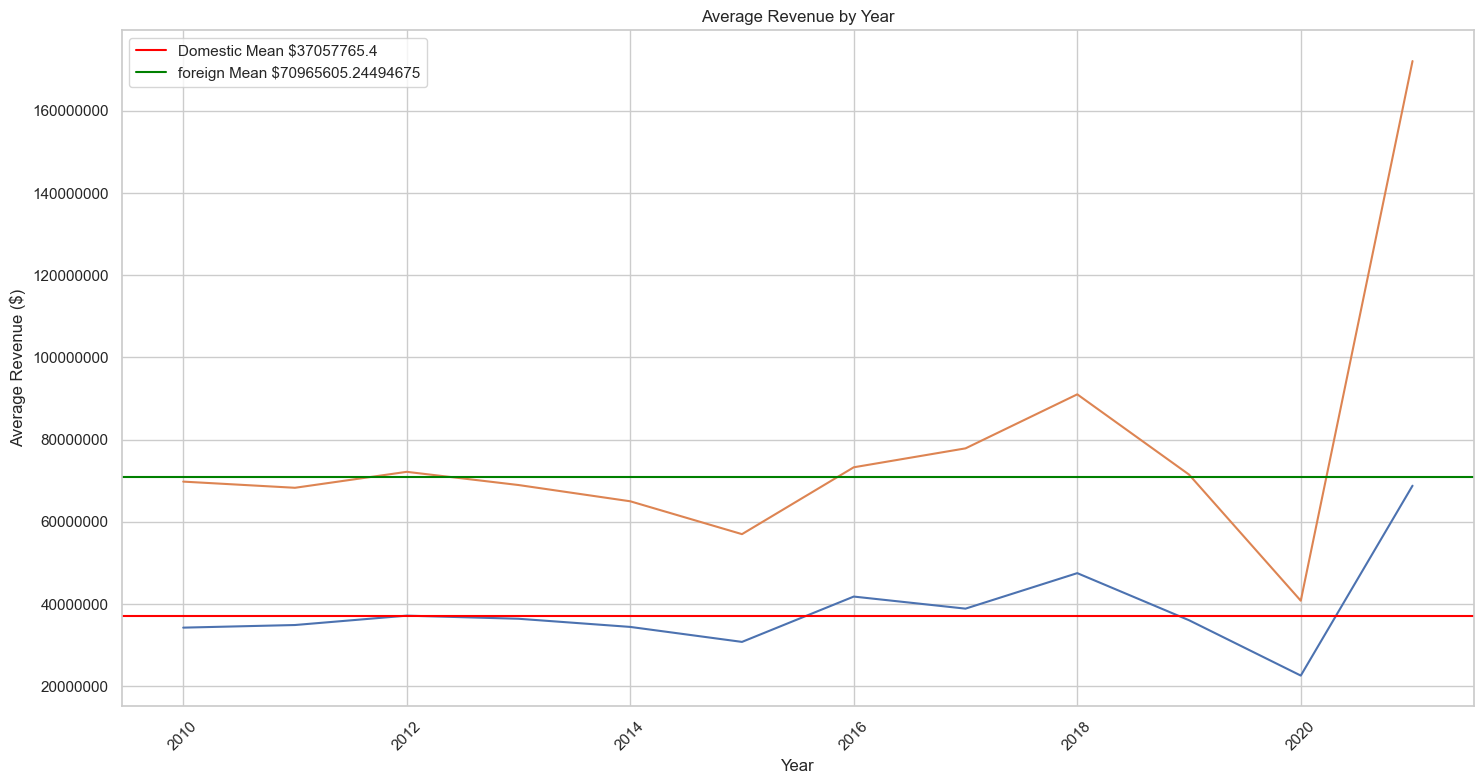

<Figure size 1200x800 with 0 Axes>

In [363]:
# Preparing data for plotting
domestic_mean = revenue_dist['domestic_gross($)'].mean()
foreign_mean = revenue_dist['worldwide_gross($)'].mean()

# Setting plot style
#plt.style.use('seaborn-darkgrid')
sns.set_context('notebook')

# Plotting average revenue trends by year
# Plot figure
plt.figure(figsize=(15, 8))

# plotting a line graph
sns.lineplot(data= revenue_dist, x='start_year', y='domestic_gross($)', estimator='mean', ci=None)
sns.lineplot(data= revenue_dist, x='start_year', y='worldwide_gross($)', estimator='mean', ci=None)
plt.axhline(domestic_mean, color= 'red', label=f'Domestic Mean ${domestic_mean}')
plt.axhline(foreign_mean, color= 'green', label=f'foreign Mean ${foreign_mean}')

# Setting titles and labels
plt.title('Average Revenue by Year')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Year')

# Other settings.
plt.xticks(rotation=45)
plt.ticklabel_format(style= 'plain')
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig('../../images/revenue trends.png', dpi= 100, bbox_inches= 'tight')

##### Conclusion
The above plot helps us understand the revenue distribution over years, comparing them to the overall means.

#### Movies with the highest revenues
We have seen how films peformed yearly, in this section we'll be looking at movies with the highest revenues. This process will focus on the top 20 highest performing films both domestically and internationally over the years. It will help us figure out if there's any pattern.

We will be working with a barplot to compare the revenues.

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


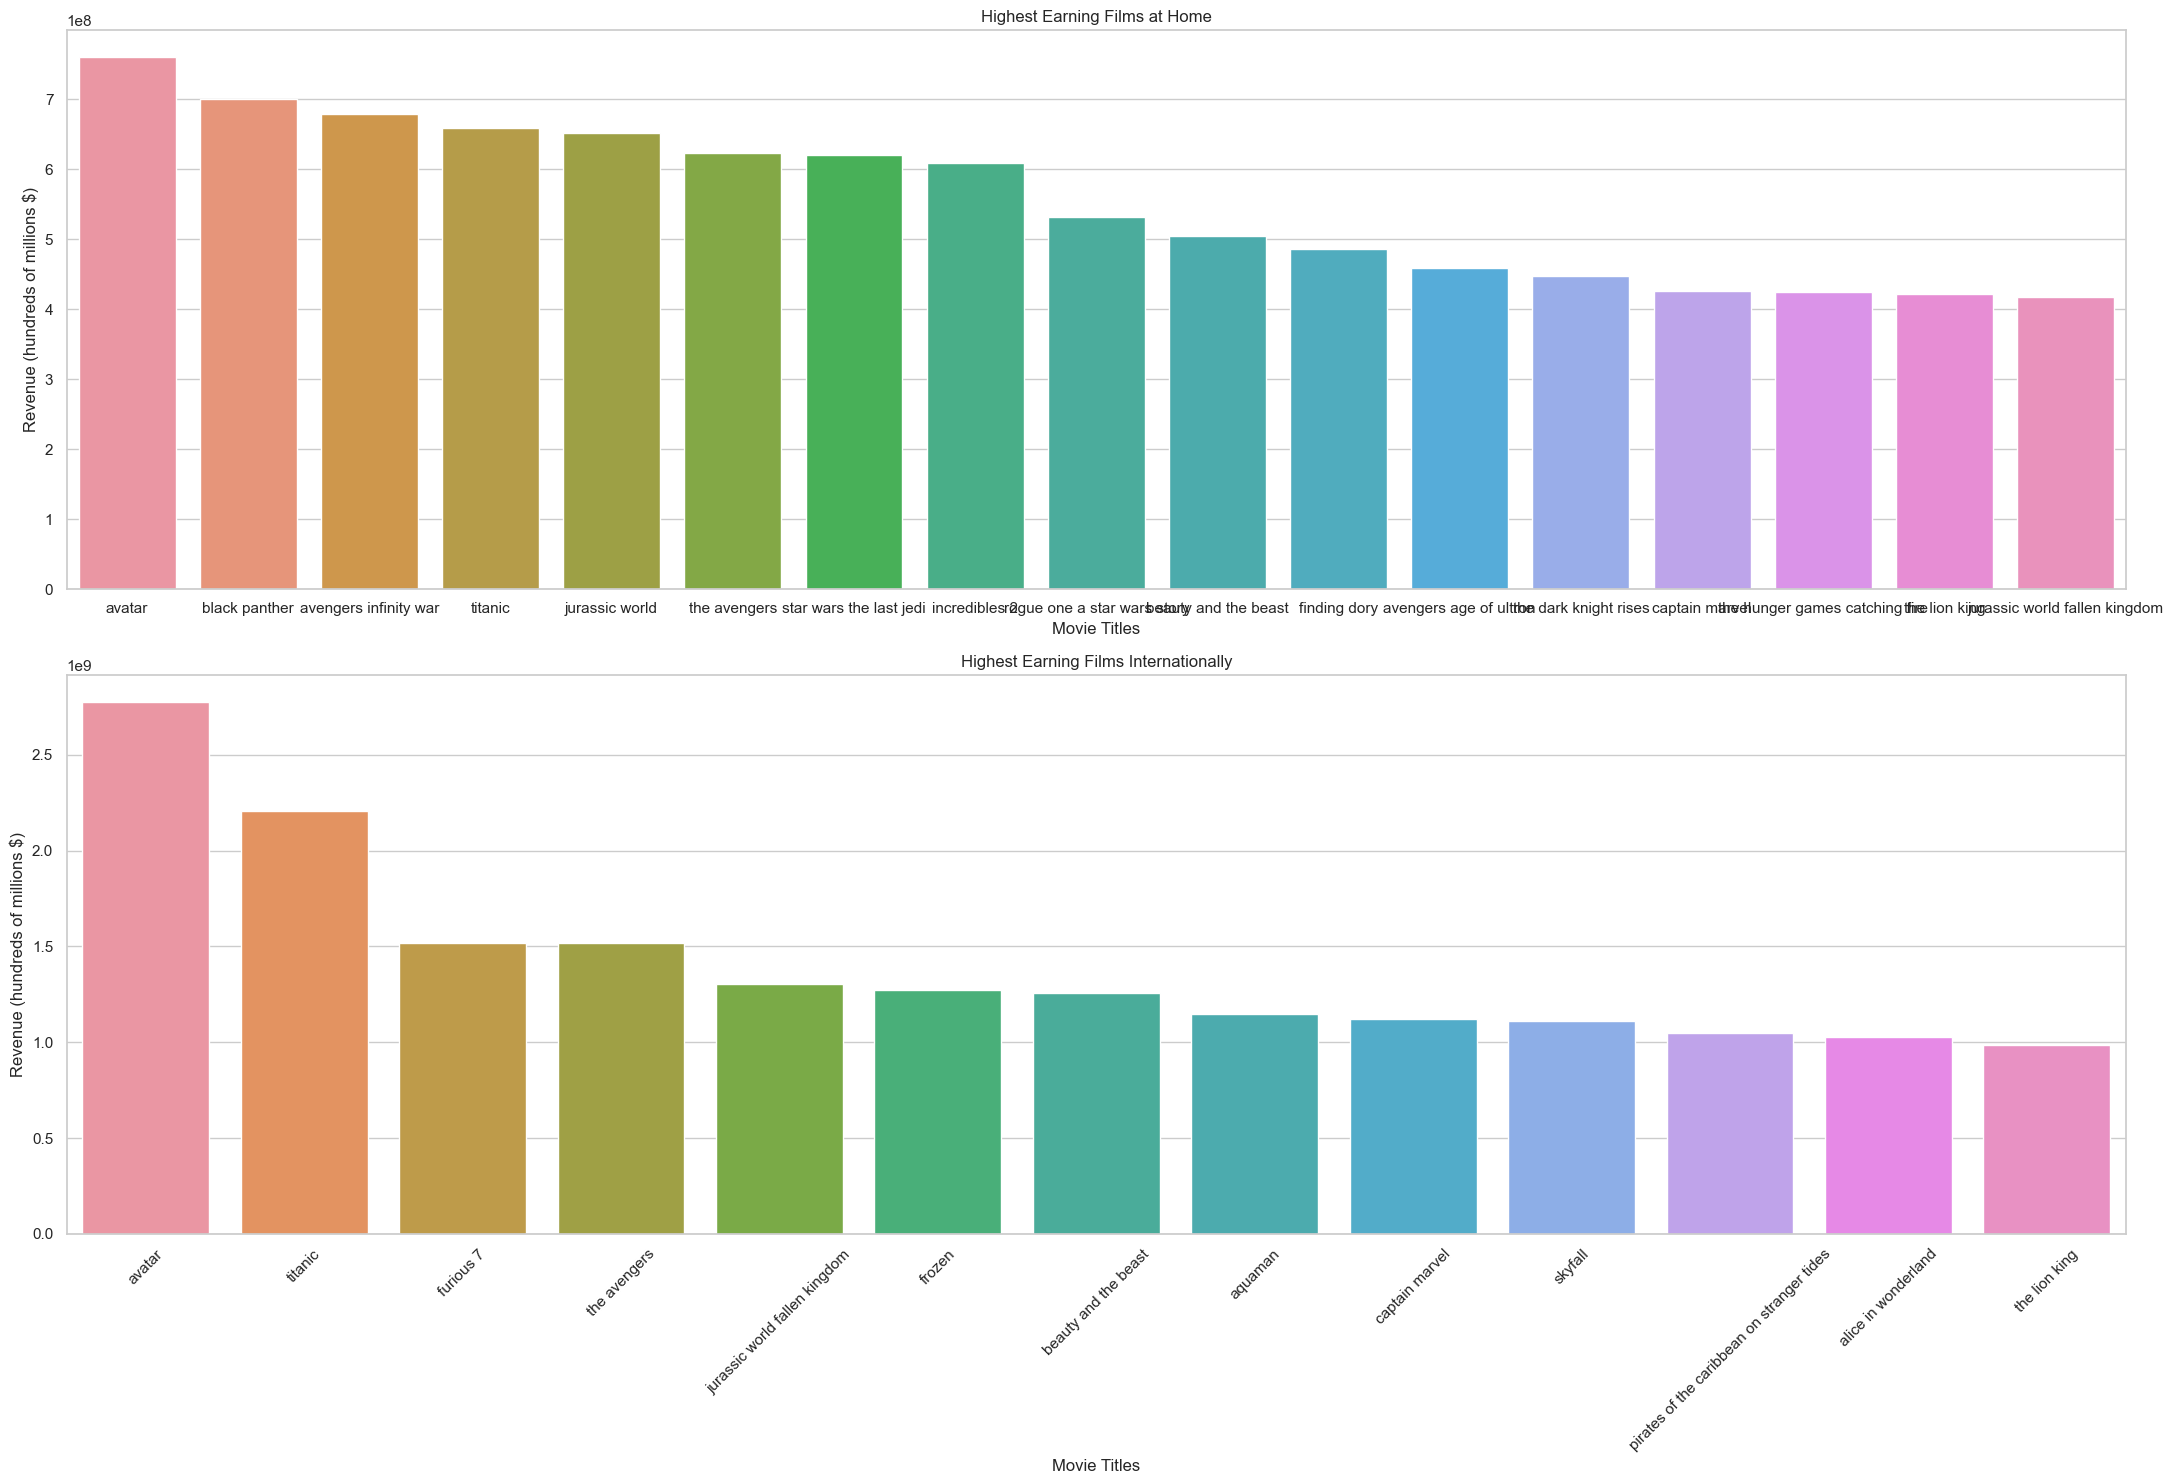

<Figure size 1200x800 with 0 Axes>

In [364]:
# plotting the highest earning films both domestic and foreign
# preparing data for plotting
domestic_revs = revenue_dist[['primary_title', 'domestic_gross($)']].sort_values(by= 'domestic_gross($)', ascending= False)
foreign_revs = revenue_dist[['primary_title', 'worldwide_gross($)']].sort_values(by= 'worldwide_gross($)', ascending= False)

title_dom = list(domestic_revs['primary_title'])
dom_gross = list(domestic_revs['domestic_gross($)'])

title_foreign = list(foreign_revs['primary_title'])
foreign_gross = list(foreign_revs['worldwide_gross($)'])

ax1_x = title_dom[:20]
ax1_y = dom_gross[:20]

ax2_x = title_foreign[:20]
ax2_y = foreign_gross[:20]

# setting titles and labels
title1 = 'Highest Earning Films at Home'
title2 = 'Highest Earning Films Internationally'

labely = 'Revenue (hundreds of millions $)'
labelx = 'Movie Titles'

# plotting
fig, (ax1, ax2) = plt.subplots(figsize= (22, 15), nrows= 2)

sns.barplot(x= ax1_x, y= ax1_y, ax= ax1)
sns.barplot(x= ax2_x, y= ax2_y, ax= ax2)

# Setting titles and labels
ax1.set_title(title1)
ax1.set_ylabel(labely)
ax1.set_xlabel(labelx)

ax2.set_title(title2)
ax2.set_ylabel(labely)
ax2.set_xlabel(labelx)

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../../images/highest_earning_films.png', dpi= 100, bbox_inches= 'tight')

##### Conclusion
From the plot above, we notice that most movies performed extremely well in both demestic and international settings, earning several millions in domestic revenue and even more in internation revenue.

For example, holding the highest earning film position both intenationally and domestic, Avatar earned an estimate of $2.7 billion and $750 million repectively in revenue.

### Directors associated high-performing films.
In this section we are going to filter data, grouping the directors with the most directed films above the 80% quantile in both domestic and international settings. 

We will be using SQLite3 to access data in the cleaned_imdb.db database and pandas to merge dataframes.

In [365]:
# This code queries the directors table and joins it with the persons table using the persons_id columns on both tables.
#  This combination will help us get information about the movies the directors directed and also give us their names.

directors_data = pd.read_sql('''SELECT *
                                FROM directors
                                JOIN persons
                                USING(person_id)
                                ''', conn)

# preview of the created dataframe
directors_data.head()

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,"director,actor,writer"
3,tt0878654,nm0089502,Albert Pyun,"director,writer,producer"
4,tt0878654,nm2291498,Joe Baile,"producer,director,camera_department"


We are going to merge the revenue_dist information with the directors data retrieving everything from the revenue_dist dataframe and only records existing in the revenue_dist dataframe from the directors_data.

This will gives us information about the movie name the directors directed and how it performed international and domestic.

In [366]:
# This code merges the revenue_dist information with the directors data using the .merge() function using the movie_id columns and the a left join

film_directors = revenue_dist.merge(directors_data, on= 'movie_id', how= 'left')
film_directors.head()

,movie_id,primary_title,start_year,domestic_gross($),worldwide_gross($),person_id,primary_name,primary_profession
0,tt0435761,toy story 3,2010,"415,000,000","652,000,000",nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
1,tt0926084,harry potter and the deathly hallows part 1,2010,"296,000,000","664,300,000",nm0946734,David Yates,"director,producer,writer"
2,tt0892791,shrek forever after,2010,"238,700,000","513,900,000",nm0593610,Mike Mitchell,"actor,director,writer"
3,tt1325004,the twilight saga eclipse,2010,"300,500,000","398,000,000",nm1720541,David Slade,"producer,director,writer"
4,tt0398286,tangled,2010,"200,800,000","391,000,000",nm1977355,Nathan Greno,"actor,art_department,director"


In [367]:
# The merge introduced noise into the data, we are using .info() to make sure we are working with a clean data 
film_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            4741 non-null   object 
 1   primary_title       4741 non-null   object 
 2   start_year          4741 non-null   int64  
 3   domestic_gross($)   4741 non-null   float64
 4   worldwide_gross($)  4741 non-null   float64
 5   person_id           4639 non-null   object 
 6   primary_name        4639 non-null   object 
 7   primary_profession  4639 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 296.4+ KB


The data contains missing values in the 3 columns we joined from the directors_data dataset. In the next code we are going to drop those columns to have a clean data.

In [368]:
# We are dropping the rows containing missing values. 

film_directors =  film_directors.dropna(subset= ['person_id', 'primary_name', 'primary_profession'])

# We are running this code to ensure that there are no null values left.
missing = revenue_dist.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

We decided on the 80% quantile for our threshold to consider a film a high-earning film.

In this section we are going to;
- Calculate the thresholds 

- Filter data that pass the thresholds

- Visualize the directors with the most films that passed the thresh.


In [369]:
# Calculating the domestic revenue threshold
high_rev_threshold_domestic = film_directors['domestic_gross($)'].quantile(0.80)
print(f'Domestic threshold: {high_rev_threshold_domestic}')

# Calculate the foreign revenue threshhold
high_rev_threshold_foreign = film_directors['worldwide_gross($)'].quantile(0.80)
print(f'Foreign threshold: {high_rev_threshold_foreign}')

Domestic threshold: 55624970.60000001
Foreign threshold: 91113683.0


In [370]:
# Filter data to contain films that are in the 80th quantile.
highest_revenue = film_directors[(film_directors['domestic_gross($)'] > high_rev_threshold_domestic) & (film_directors['worldwide_gross($)'] > high_rev_threshold_foreign)]

highest_revenue = highest_revenue[['primary_name', 'primary_title', 'domestic_gross($)', 'worldwide_gross($)']]

highest_revenue.head()

,primary_name,primary_title,domestic_gross($),worldwide_gross($)
0,Lee Unkrich,toy story 3,"415,000,000","652,000,000"
1,David Yates,harry potter and the deathly hallows part 1,"296,000,000","664,300,000"
2,Mike Mitchell,shrek forever after,"238,700,000","513,900,000"
3,David Slade,the twilight saga eclipse,"300,500,000","398,000,000"
4,Nathan Greno,tangled,"200,800,000","391,000,000"


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


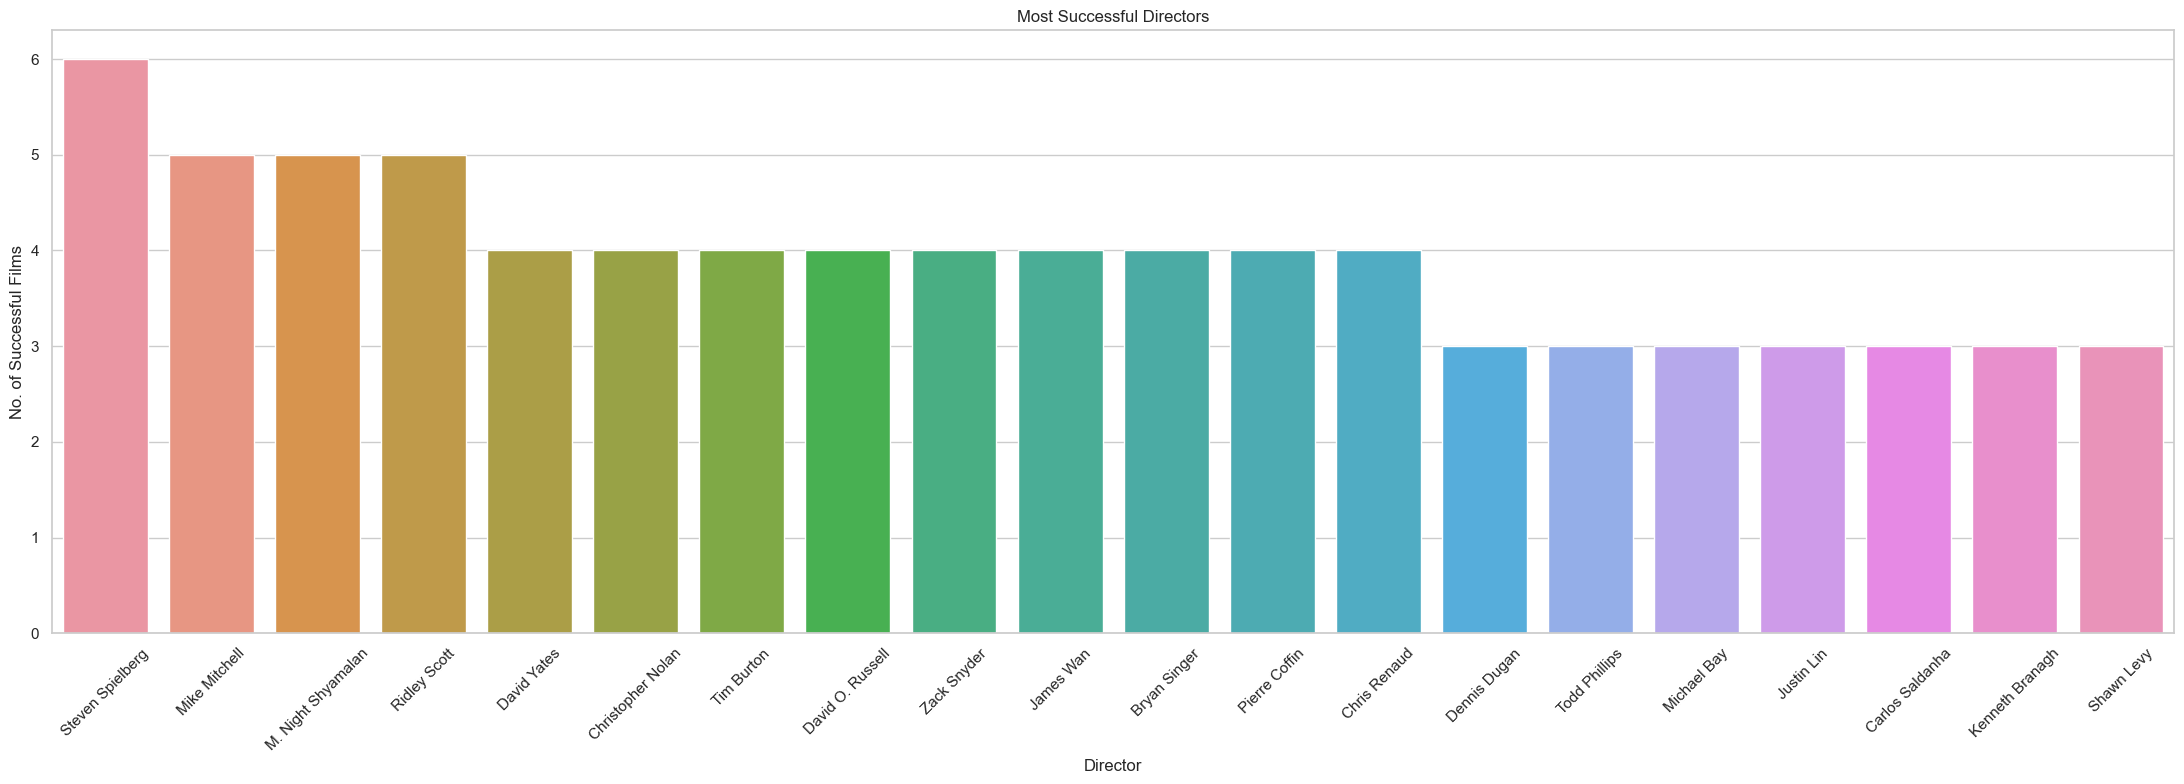

<Figure size 1200x800 with 0 Axes>

In [371]:
# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the directors in the highest_revenue data
directors_list = list(highest_revenue['primary_name'])

# converting the list to a dictionary that holds director's name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 directors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# Preparing data for plotting
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting most successful directors
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Directors')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../../images/directors.png', dpi= 100, bbox_inches= 'tight')

In [372]:
high_rev_directors = name

#### Conclusion 
We conclude that the most successful directors according to high performing films include 'Steven Spielberg', 'Mike Mitchell', 'M. Night Shyamalan', 'Ridley Scott', 'David Yates', 'Christopher Nolan', 'Tim Burton', 'David O. Russel', 'Zack Snyder', 'James Wan', 'Bryan Singer', 'Pierre Coffin', 'Chris Renaud', 'Todd Phillips', and 'Michael Bay' among others.


### Directors associated with high earnings films but with low production budget
Part of the objectives is identifying directors who produced films on low budgets and the films performed exceptionally well. In this section we going to access the production_budgets data from the cleaned database and merge it with our highest_revenue data and calculate the low budget threshold and filter the data.

This is going to help us;
- Access the highest_revenue movies' production budgets

- Identify directors who can work with limited resources


In [373]:
# Using SQLite3 to retrieve the production_budgets dataset

production_budgets = pd.read_sql('''SELECT *
                                    FROM production_budgets''', conn)

# Previewing the dataframe
production_budgets.head()

,movie,production_budget($)
0,avatar,425000000
1,pirates of the caribbean on stranger tides,410600000
2,dark phoenix,350000000
3,avengers age of ultron,330600000
4,star wars ep viii the last jedi,317000000


In [374]:
# This will help us identify the low budget threshold.
production_budgets.describe()

,production_budget($)
count,"5,782"
mean,"31,587,757"
std,"41,812,077"
min,"1,100"
25%,"5,000,000"
50%,"17,000,000"
75%,"40,000,000"
max,"425,000,000"


We are merging the revenue_dist information with the production_budgets data retrieving everything from the revenue_dist dataframe and only records existing in the revenue_dist dataframe from the production_budgets data.

This will provide us with information on the movie name, the director, how it performed international and domestic as well as its production budget

In [375]:
# The production_budgets' movie title column differs from the highest_revenue column
# This code renames the column to enable smooth merging
production_budgets.rename(columns={'movie': 'primary_title'}, inplace= True)

# Merging the highest_revenue data with the production_budgets using the primary_title.
directors_budget = highest_revenue.merge(production_budgets, on= 'primary_title', how= 'left')

directors_budget.head()

,primary_name,primary_title,domestic_gross($),worldwide_gross($),production_budget($)
0,Lee Unkrich,toy story 3,"415,000,000","652,000,000","200,000,000"
1,David Yates,harry potter and the deathly hallows part 1,"296,000,000","664,300,000",NaN
2,Mike Mitchell,shrek forever after,"238,700,000","513,900,000","165,000,000"
3,David Slade,the twilight saga eclipse,"300,500,000","398,000,000","68,000,000"
4,Nathan Greno,tangled,"200,800,000","391,000,000","260,000,000"


In [376]:
# Calculating the low budget threshold

low_budget_thresh = production_budgets['production_budget($)'].quantile(0.40)
print(f'Low production budget threshold: {low_budget_thresh}')

# This code filters out the record that have budgets lower than the budget threshold.
low_budget_high_rev = directors_budget[directors_budget['production_budget($)'] < low_budget_thresh]

low_budget_high_rev.head()

Low production budget threshold: 11000000.0


,primary_name,primary_title,domestic_gross($),worldwide_gross($),production_budget($)
15,Tod Williams,paranormal activity 2,"84,800,000","92,800,000","3,000,000"
42,Ariel Schulman,paranormal activity 3,"104,000,000","103,000,000","5,000,000"
43,Henry Joost,paranormal activity 3,"104,000,000","103,000,000","5,000,000"
145,John R. Leonetti,annabelle,"84,300,000","172,800,000","6,500,000"
264,Jamie Buckner,split,"138,300,000","140,200,000","5,000,000"


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


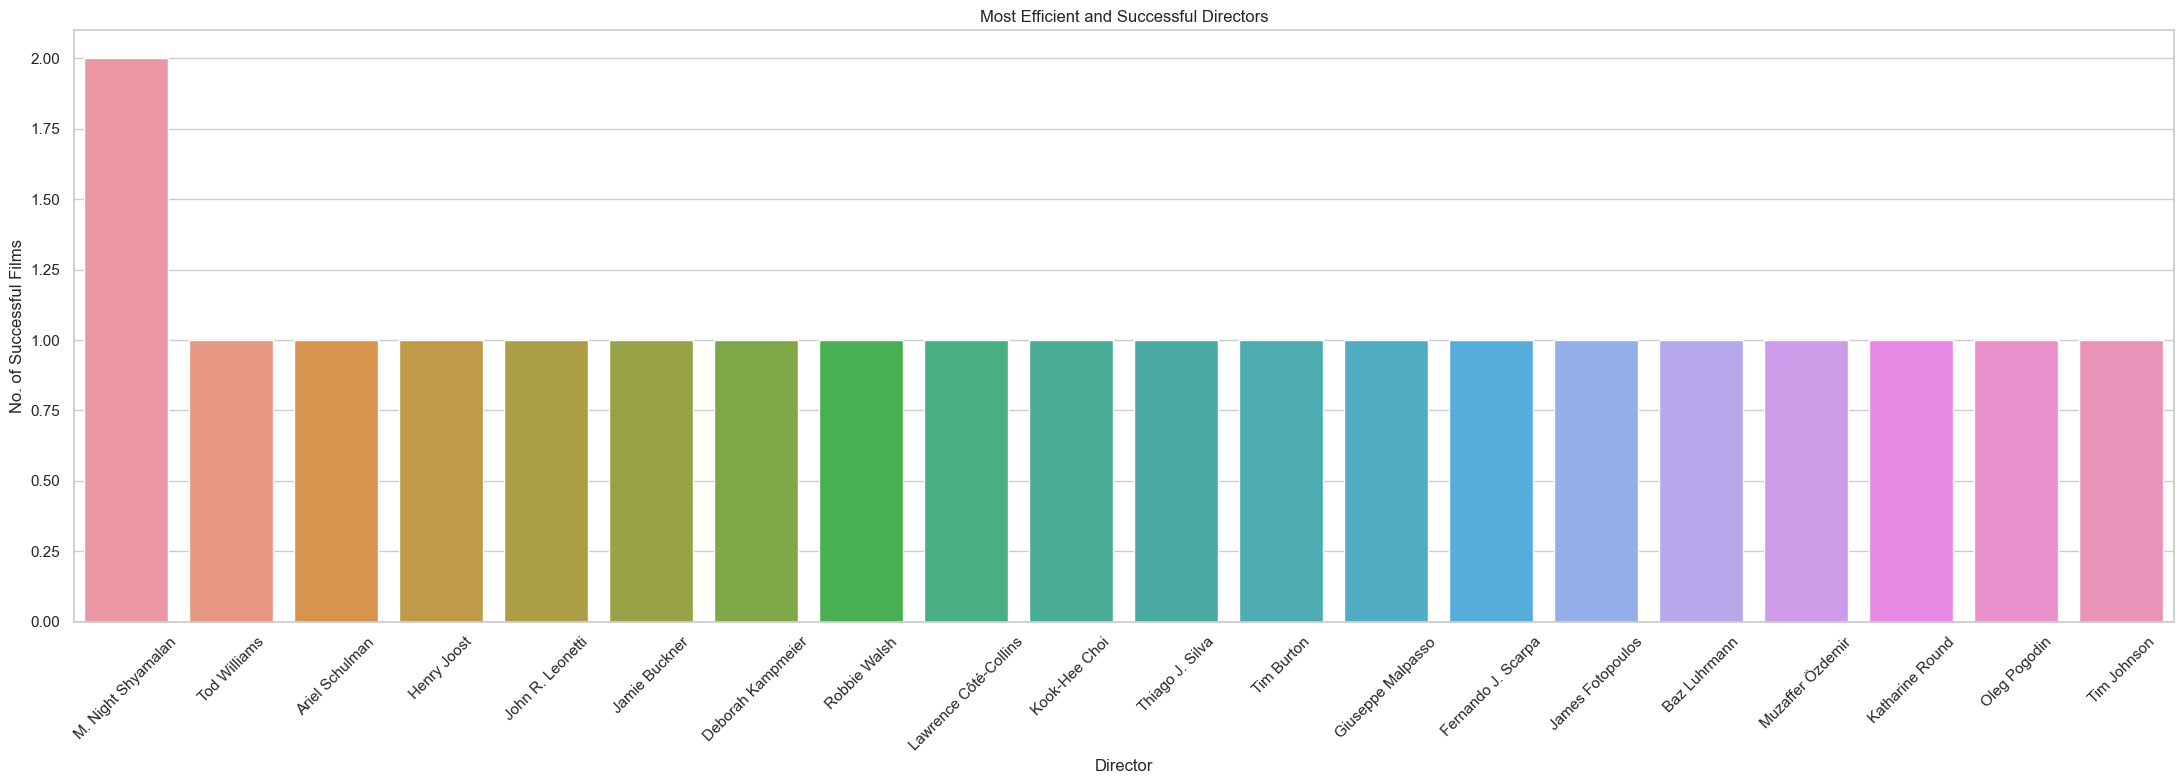

<Figure size 1200x800 with 0 Axes>

In [377]:
# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the directors in the low_budget_high_rev data
directors_list = list(low_budget_high_rev['primary_name'])

# converting the list to a dictionary that holds director's name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 efficient and successful directors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# plotting most 
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Efficient and Successful Directors')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../../images/low_budget_directors.png', dpi= 100, bbox_inches= 'tight')

In [378]:

low_budget_directors = name

In [379]:
effecient_directors = []

for x in high_rev_directors:
    if x in low_budget_directors:
        effecient_directors.append(x)

effecient_directors

['M. Night Shyamalan', 'Tim Burton']

#### Conclusion
We have identified M. Night Shyamalan', 'Tod Williams', 'Ariel Schulman', 'Henry Joost', 'John R. Leonetti', 'Jamie Buckner', 'Deborah Kampmeier', 'Robbie Walsh', 'Lawrence Côté-Collins', 'Kook-Hee Choi', 'Thiago J. Silva', 'Tim Burton', 'Giuseppe Malpasso', and 'Fernando J. Scarpa', among other directors to be the most efficient and successful directors. Their production works used very low budgets and yielded very high revenue.

Among the directors named above, we have identified that 'M. Night Shyamalan' and 'Tim Burton' are the most efficient of all, having graced both director charts as the most successful and most efficient.


In [380]:
# This code retrieves the info for the movies directed in the plot above
# We are creating a new column in the low_budget_high_rev dataframe.
low_budget_high_rev['examples'] = low_budget_high_rev['primary_name'].isin(name)

# This code retrieves the info for the movies directed 
work_review = low_budget_high_rev[low_budget_high_rev['examples'] == True]

#previewing the data
work_review.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12192\1361648207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_budget_high_rev['examples'] = low_budget_high_rev['primary_name'].isin(name)


,primary_name,primary_title,domestic_gross($),worldwide_gross($),production_budget($),examples
15,Tod Williams,paranormal activity 2,"84,800,000","92,800,000","3,000,000",True
42,Ariel Schulman,paranormal activity 3,"104,000,000","103,000,000","5,000,000",True
43,Henry Joost,paranormal activity 3,"104,000,000","103,000,000","5,000,000",True
145,John R. Leonetti,annabelle,"84,300,000","172,800,000","6,500,000",True
264,Jamie Buckner,split,"138,300,000","140,200,000","5,000,000",True


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

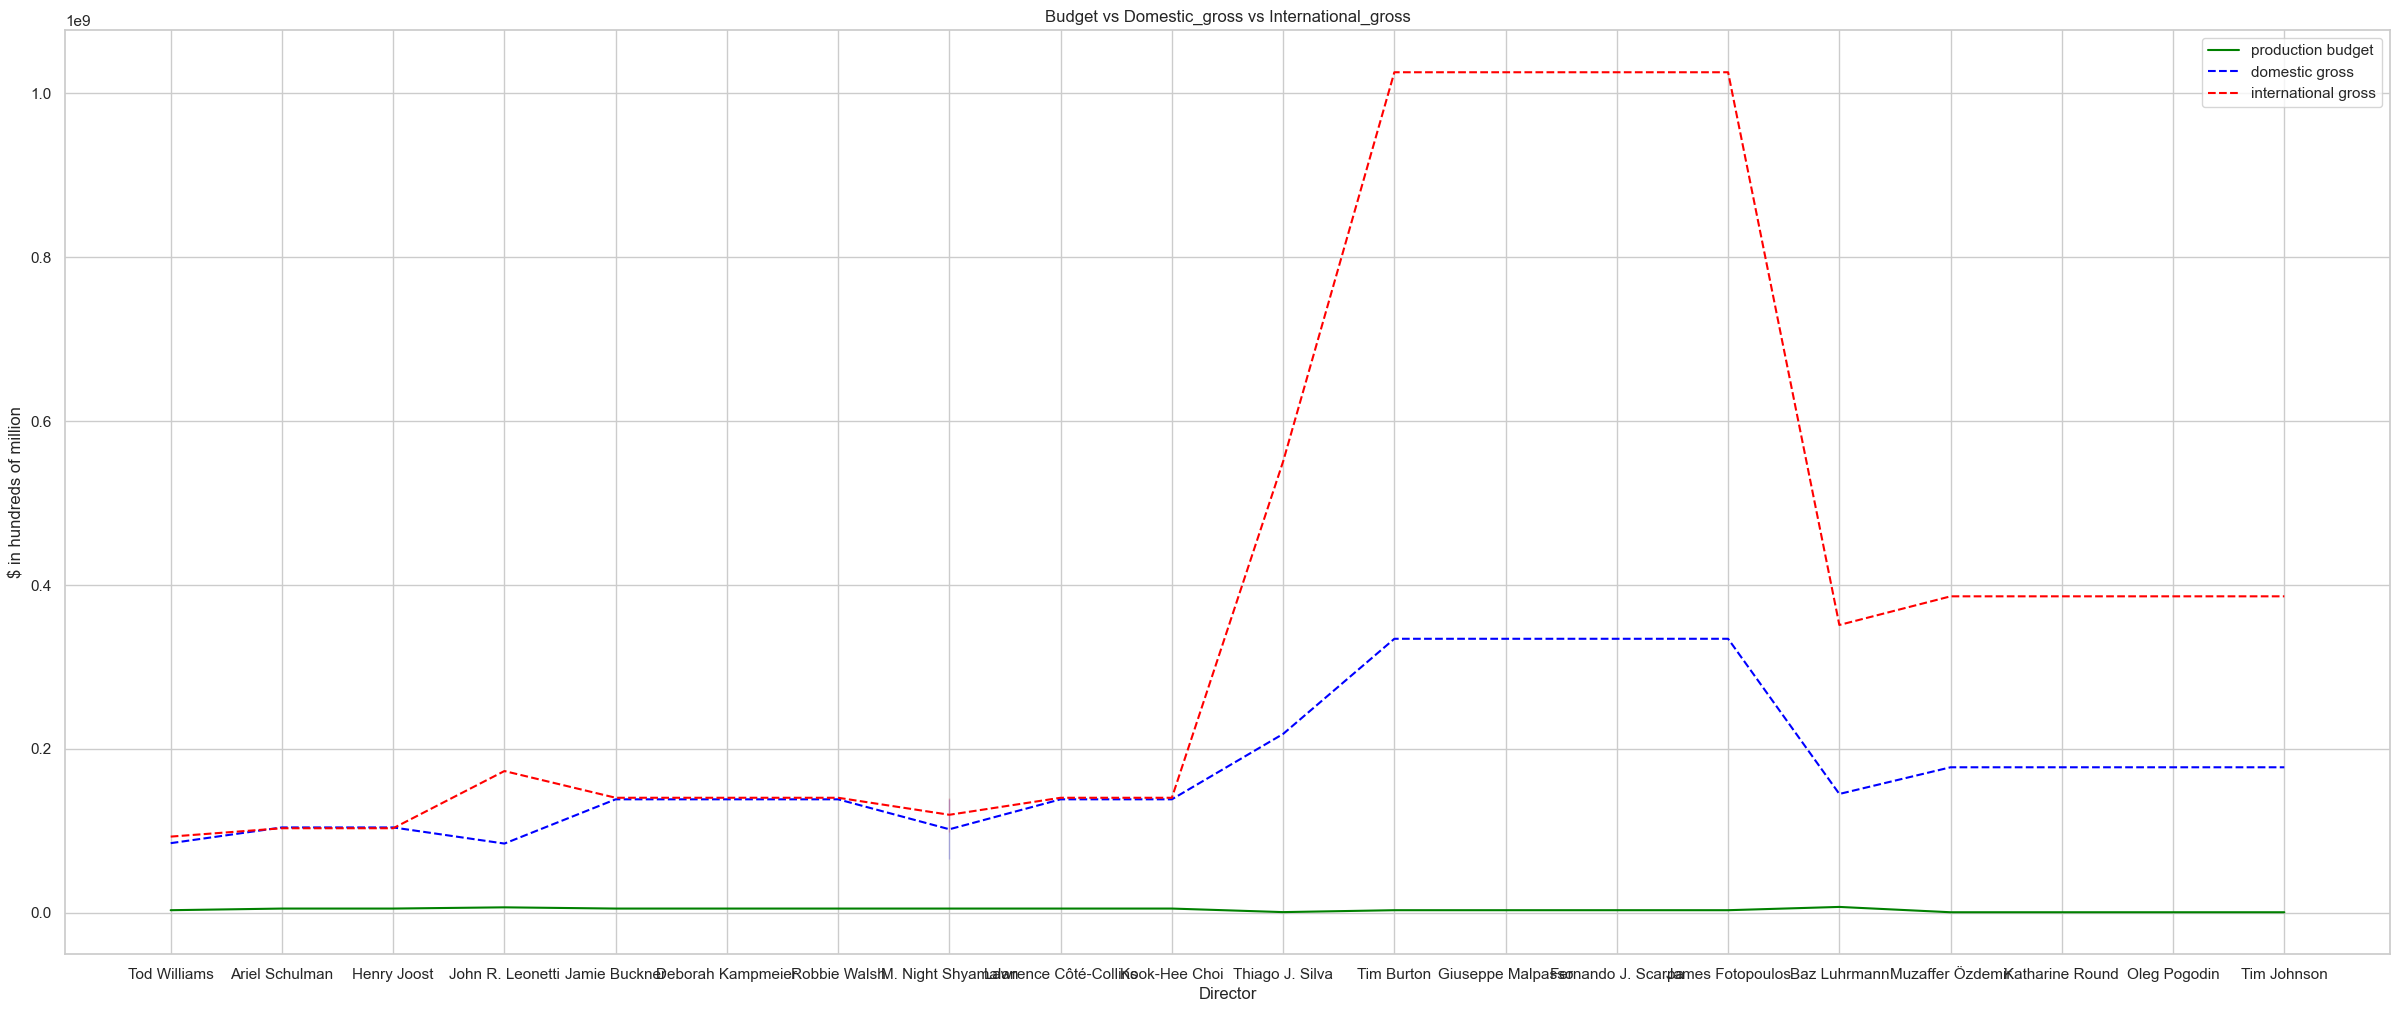

In [381]:
# Plotting Budget vs Domestic_gross vs International_gross
fig, (ax1) = plt.subplots(figsize= (30, 12))

# Plotting
sns.lineplot(data= work_review, x= 'primary_name', y= 'production_budget($)', ax= ax1, markers= 'o', color='green', label= 'production budget')
sns.lineplot(data= work_review, x= 'primary_name', y= 'domestic_gross($)', ax= ax1, markers= 'o', linestyle= '--', linewidth= 1.5, color= 'blue', label= 'domestic gross')
sns.lineplot(data= work_review, x= 'primary_name', y= 'worldwide_gross($)', ax= ax1, markers= 'o', linewidth= 1.5, color= 'red', linestyle= '--', label= 'international gross')

# Setting title and labels
ax1.set_title('Budget vs Domestic_gross vs International_gross')
ax1.set_ylabel('$ in hundreds of million')
ax1.set_xlabel('Director')
plt.legend()

plt.savefig('../../images/budget_vs_revenues.png', dpi= 100, bbox_inches= 'tight');

`Conclusion`

In the plot above, Directors with te most favourable results are 'Thiago J. Silva', 'Tim Burton', 'Giuseppe Malpasso', and 'Fernando J. Scarpa', with all films performing extremely well.

### Actors whose presence significantly correlates with high box office returns, suggesting their popularity.
In this section we are going to identify actors and actresses whose presence correlates with highest films returns. We will be using the `actors_and_actresses` data, the `persons` data as well as the revenue_dist data to identify them.

This process will include;
- Data retrieval

- Data engineering - to fit our purpose

- Visualization

In [382]:
# This code uses SQLite3 to retrieve data from the actors_and_actresses table in the cleaned database and in a left join retrieves data from the persons table.

actors = pd.read_sql('''SELECT *
                        FROM actors_and_actresses
                        LEFT JOIN persons
                        USING(person_id)''', conn)

# Previewing the dataframe
actors.head()

,movie_id,ordering,person_id,category,primary_name,primary_profession
0,tt0111414,1,nm0246005,actor,Tommy Dysart,actor
1,tt0323808,1,nm3579312,actress,Brittania Nicol,"actress,soundtrack"
2,tt0323808,2,nm2694680,actor,Henry Garrett,actor
3,tt0323808,3,nm0574615,actor,Graham McTavish,"actor,soundtrack,director"
4,tt0323808,4,nm0502652,actress,Jacqueline Leonard,actress


We are merging the revenue_dist information with the actors data retrieving everything from the revenue_dist dataframe and only records existing in the revenue_dist dataframe from the actors data.

This will provide us with information on the movie name, the actor, how it performed international and domestic.

In [383]:
# We are merging the revenue_dist data with the actors data using the movie_id column

actors_movies = revenue_dist.merge(actors, on= 'movie_id', how= 'left')

# Previewing the data
actors_movies.head()

,movie_id,primary_title,start_year,domestic_gross($),worldwide_gross($),ordering,person_id,category,primary_name,primary_profession
0,tt0435761,toy story 3,2010,"415,000,000","652,000,000",1,nm0000158,actor,Tom Hanks,"producer,actor,soundtrack"
1,tt0435761,toy story 3,2010,"415,000,000","652,000,000",2,nm0000741,actor,Tim Allen,"actor,producer,miscellaneous"
2,tt0435761,toy story 3,2010,"415,000,000","652,000,000",3,nm0000349,actress,Joan Cusack,"actress,soundtrack,writer"
3,tt0435761,toy story 3,2010,"415,000,000","652,000,000",4,nm0000885,actor,Ned Beatty,"actor,soundtrack"
4,tt0926084,harry potter and the deathly hallows part 1,2010,"296,000,000","664,300,000",1,nm0705356,actor,Daniel Radcliffe,"actor,soundtrack,producer"


In [385]:
actors_movies.columns

Index(['movie_id', 'primary_title', 'start_year', 'domestic_gross($)',
       'worldwide_gross($)', 'ordering', 'person_id', 'category',
       'primary_name', 'primary_profession'],
      dtype='object')

In [387]:
# In this code we are filtering the actors_movies data by adding only the columns relevant to this analysis.
actors_movies = actors_movies[['primary_title', 'domestic_gross($)', 'worldwide_gross($)', 'category', 'primary_name']] #removed characters

# Here we are filtering data that meet the high revenue thresholds
actors_movies = actors_movies[(actors_movies['domestic_gross($)'] > high_rev_threshold_domestic) & (actors_movies['worldwide_gross($)'] > high_rev_threshold_foreign)]

# Previewing the filtered data
actors_movies.head()

,primary_title,domestic_gross($),worldwide_gross($),category,primary_name
0,toy story 3,"415,000,000","652,000,000",actor,Tom Hanks
1,toy story 3,"415,000,000","652,000,000",actor,Tim Allen
2,toy story 3,"415,000,000","652,000,000",actress,Joan Cusack
3,toy story 3,"415,000,000","652,000,000",actor,Ned Beatty
4,harry potter and the deathly hallows part 1,"296,000,000","664,300,000",actor,Daniel Radcliffe


In [388]:
# To ensure our data is clean, we are going to check the summary

actors_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2469 entries, 0 to 15087
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       2469 non-null   object 
 1   domestic_gross($)   2469 non-null   float64
 2   worldwide_gross($)  2469 non-null   float64
 3   category            2421 non-null   object 
 4   primary_name        2323 non-null   object 
dtypes: float64(2), object(3)
memory usage: 115.7+ KB


The merged data has introduced noise to our dataset. The next course of action is dropping the affected rows to maintain a clean data.

- We will be using the .dropna() function

In [389]:
# Dropping all null values
actors_movies.dropna(inplace=True)

# We are running this code to ensure that there are no null values left.
missing = actors_movies.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


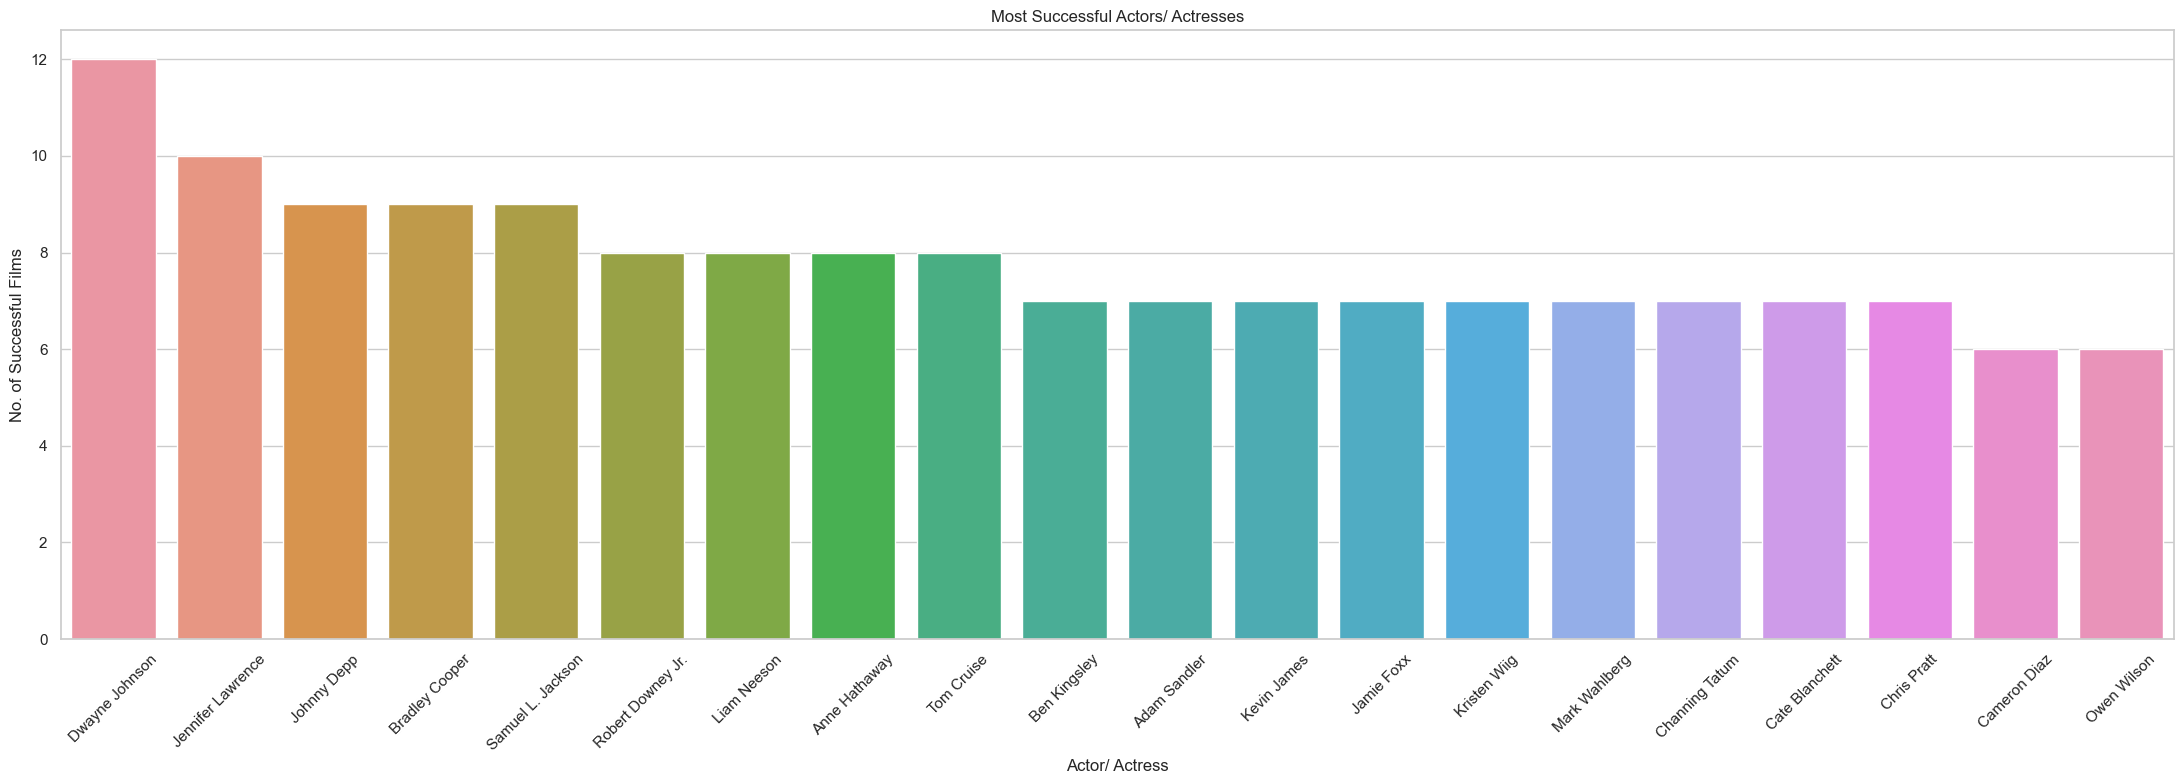

<Figure size 1200x800 with 0 Axes>

In [390]:
# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the actors and actresses in the actors_movies data
actors_list = list(actors_movies['primary_name'])

# converting the list to a dictionary that holds actor's and actress' name and how many times they appear
actors_dict = {}
for x in actors_list:
    if x not in actors_dict:
        actors_dict[x] = 1
    else:
        actors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
actor_tuple = list(actors_dict.items())
actor_tuple_sorted = sorted(actor_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 successful actors/ actresses with the most films above the threshholds.
final_data = actor_tuple_sorted[:20]


# plotting most succeful actors
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Actors/ Actresses')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Actor/ Actress')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../../images/actors_actresses.png', dpi= 100, bbox_inches= 'tight')

##### Conclusion
We have identified 'Dwayne Johnson', 'Jennifer Lawrence', 'Johnny Depp', 'Bradley Cooper', 'Samuel L. Jackson', 'Robert Downey Jr.', 'Liam Neeson', 'Anne Hathaway', 'Tom Cruise', 'Ben Kingsley', 'Adam Sandler', 'Kevin James', 'Jamie Foxx', 'Kristen Wiig', 'Mark Wahlberg' 'Channing Tatum', 'Cate Blanchett', 'Chris Pratt', 'Cameron Diaz', and 'Owen Wilson', as the most popular actors and actresses in the film industry, having associated them with high earning films.

#### Popular actors

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


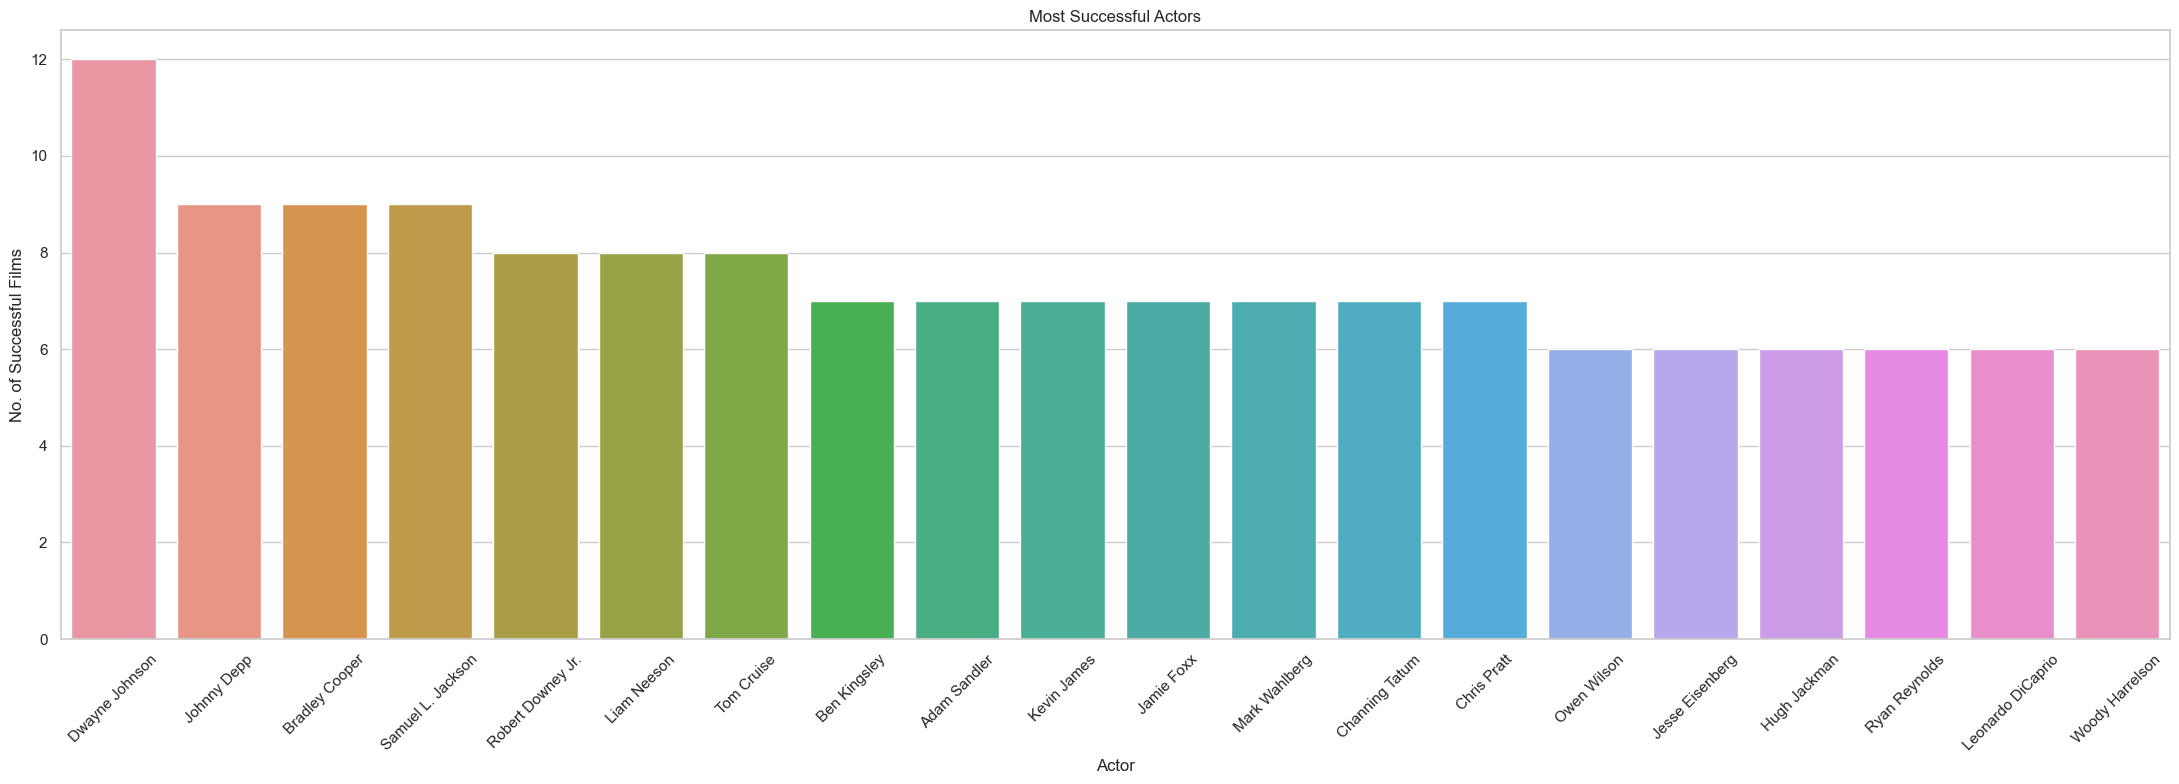

<Figure size 1200x800 with 0 Axes>

In [391]:
# Filtering data to only retrieve the actors
popular_actors = actors_movies[actors_movies['category'] == 'actor']

# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the actors in the actors_movies data
directors_list = list(popular_actors['primary_name'])

# converting the list to a dictionary that holds actor's name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 successful actors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# plotting most succeful actors
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Actors')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Actor')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../../images/Actors.png', dpi= 100, bbox_inches= 'tight')

##### Conclusion
We identified that 'Dwayne Johnson', 'Johnny Depp','Bradley Cooper', 'Samuel L. Jackson', 'Robert Downey Jr.', 'Liam Neeson', 'Tom Cruise', 'Ben Kingsley', 'Adam Sandler', 'Kevin James' ,'Jamie Foxx', 'Mark Wahlberg', and 'Channing Tatum' are the top ten most popular actors in the industry. Their presence in films contribute greatly to the film's performance.

#### Popular actresses

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


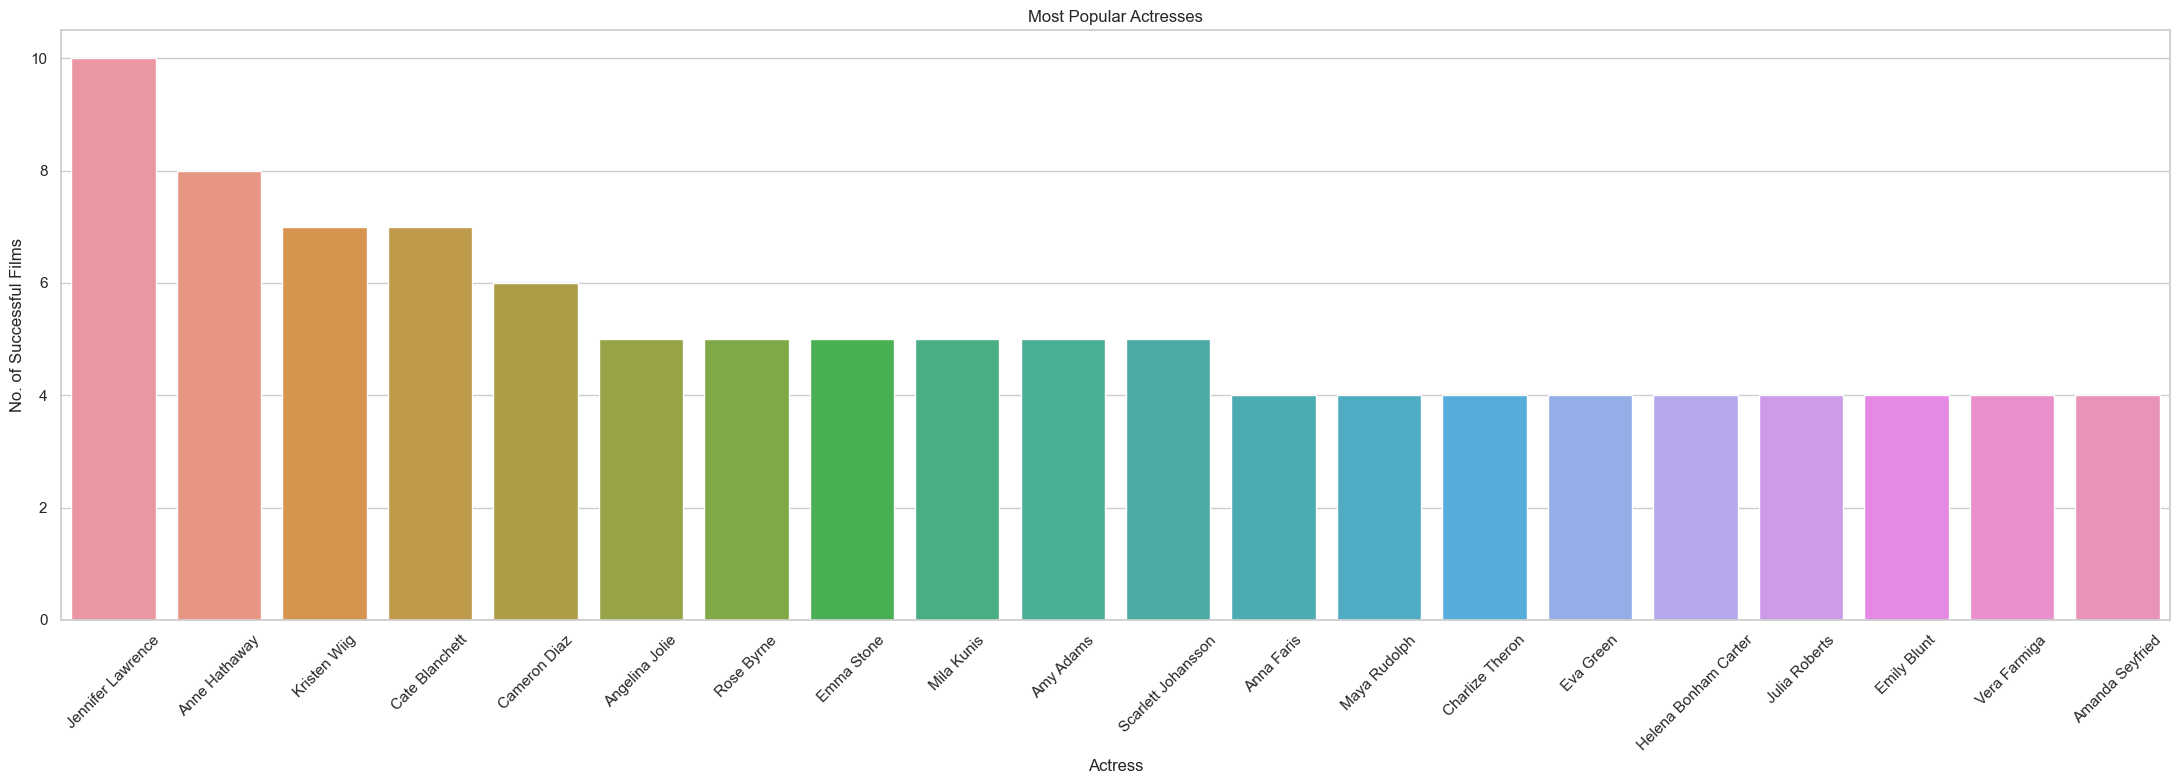

<Figure size 1200x800 with 0 Axes>

In [392]:
popular_actresses = actors_movies[actors_movies['category'] == 'actress']

# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the actresses in the actors_movies data
directors_list = list(popular_actresses['primary_name'])

# converting the list to a dictionary that holds actress' name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 successful actors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# plotting most succeful actoresses
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Popular Actresses')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Actress')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../../images/actresses.png', dpi= 100, bbox_inches= 'tight')

##### Conclusion
We identified that 'Jennifer Lawrence', 'Anne Hathaway', 'Kristen Wiig', 'Cate Blanchett', 'Cameron Diaz', 'Angelina Jolie', 'Rose Byrne', 'Emma Stone', 'Mila Kunis', 'Amy Adams', 'Scarlett Johansson', and 'Anna Faris', are the top ten most popular actresses at the moment.

### Identify writers associated with high earning films.
Writers are the most crucial part of any production teams. In this section we are identifying writers associated with the highest performing films in the industry, analyzing how many films they have written and their influence on the films.

This process is going to involve;
- Data engineering

- Visualizations

In [393]:
# This code uses SQLite3 to retrieve data from the writers table in the cleaned database and in a left join retrieves data from the persons table.
writers = pd.read_sql('''SELECT *
                         FROM writers
                         LEFT JOIN persons
                         USING(person_id)''', conn)

# Previewing the dataframe
writers.head()

,movie_id,person_id,primary_name,primary_profession,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer",Tony Vitale,"producer,director,writer"
1,tt0438973,nm0175726,Steve Conrad,"writer,producer,director",Steve Conrad,"writer,producer,director"
2,tt0438973,nm1802864,Sean Sorensen,"producer,writer",Sean Sorensen,"producer,writer"
3,tt0462036,nm1940585,Bill Haley,"director,writer,producer",Bill Haley,"director,writer,producer"
4,tt0835418,nm0310087,Peter Gaulke,"writer,actor,director",Peter Gaulke,"writer,actor,director"


We are merging the revenue_dist information with the writers data retrieving everything from the revenue_dist dataframe and only records existing in the revenue_dist dataframe from the writers data.

This will provide us with information on the movie name, the writer, and how it performed international and domestic.

In [394]:
# Merging the revenue_dist with the writers data using the movie_id column
popular_writers = revenue_dist.merge(writers, on= 'movie_id', how= 'left')

# Previewing the merged data
popular_writers.head()

,movie_id,primary_title,start_year,domestic_gross($),worldwide_gross($),person_id,primary_name,primary_profession,primary_name,primary_profession
0,tt0435761,toy story 3,2010,"415,000,000","652,000,000",nm0005124,John Lasseter,"producer,writer,director",John Lasseter,"producer,writer,director"
1,tt0435761,toy story 3,2010,"415,000,000","652,000,000",nm0004056,Andrew Stanton,"writer,actor,producer",Andrew Stanton,"writer,actor,producer"
2,tt0435761,toy story 3,2010,"415,000,000","652,000,000",nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous",Lee Unkrich,"editorial_department,editor,miscellaneous"
3,tt0435761,toy story 3,2010,"415,000,000","652,000,000",nm1578335,Michael Arndt,"writer,miscellaneous,producer",Michael Arndt,"writer,miscellaneous,producer"
4,tt0926084,harry potter and the deathly hallows part 1,2010,"296,000,000","664,300,000",nm0460141,Steve Kloves,"writer,producer,director",Steve Kloves,"writer,producer,director"


In [395]:
# In this code we are filtering the popular data by adding only the columns relevant to this analysis.
popular_writers = popular_writers[['primary_title', 'domestic_gross($)', 'worldwide_gross($)', 'primary_name']]

# We are filtering data that meet the highest revenue thresholds
popular_writers = popular_writers[(popular_writers['domestic_gross($)'] > high_rev_threshold_domestic) & (popular_writers['worldwide_gross($)'] > high_rev_threshold_foreign)]

# Previewing the filtered data
popular_writers.head()

,primary_title,domestic_gross($),worldwide_gross($),primary_name,primary_name
0,toy story 3,"415,000,000","652,000,000",John Lasseter,John Lasseter
1,toy story 3,"415,000,000","652,000,000",Andrew Stanton,Andrew Stanton
2,toy story 3,"415,000,000","652,000,000",Lee Unkrich,Lee Unkrich
3,toy story 3,"415,000,000","652,000,000",Michael Arndt,Michael Arndt
4,harry potter and the deathly hallows part 1,"296,000,000","664,300,000",Steve Kloves,Steve Kloves


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


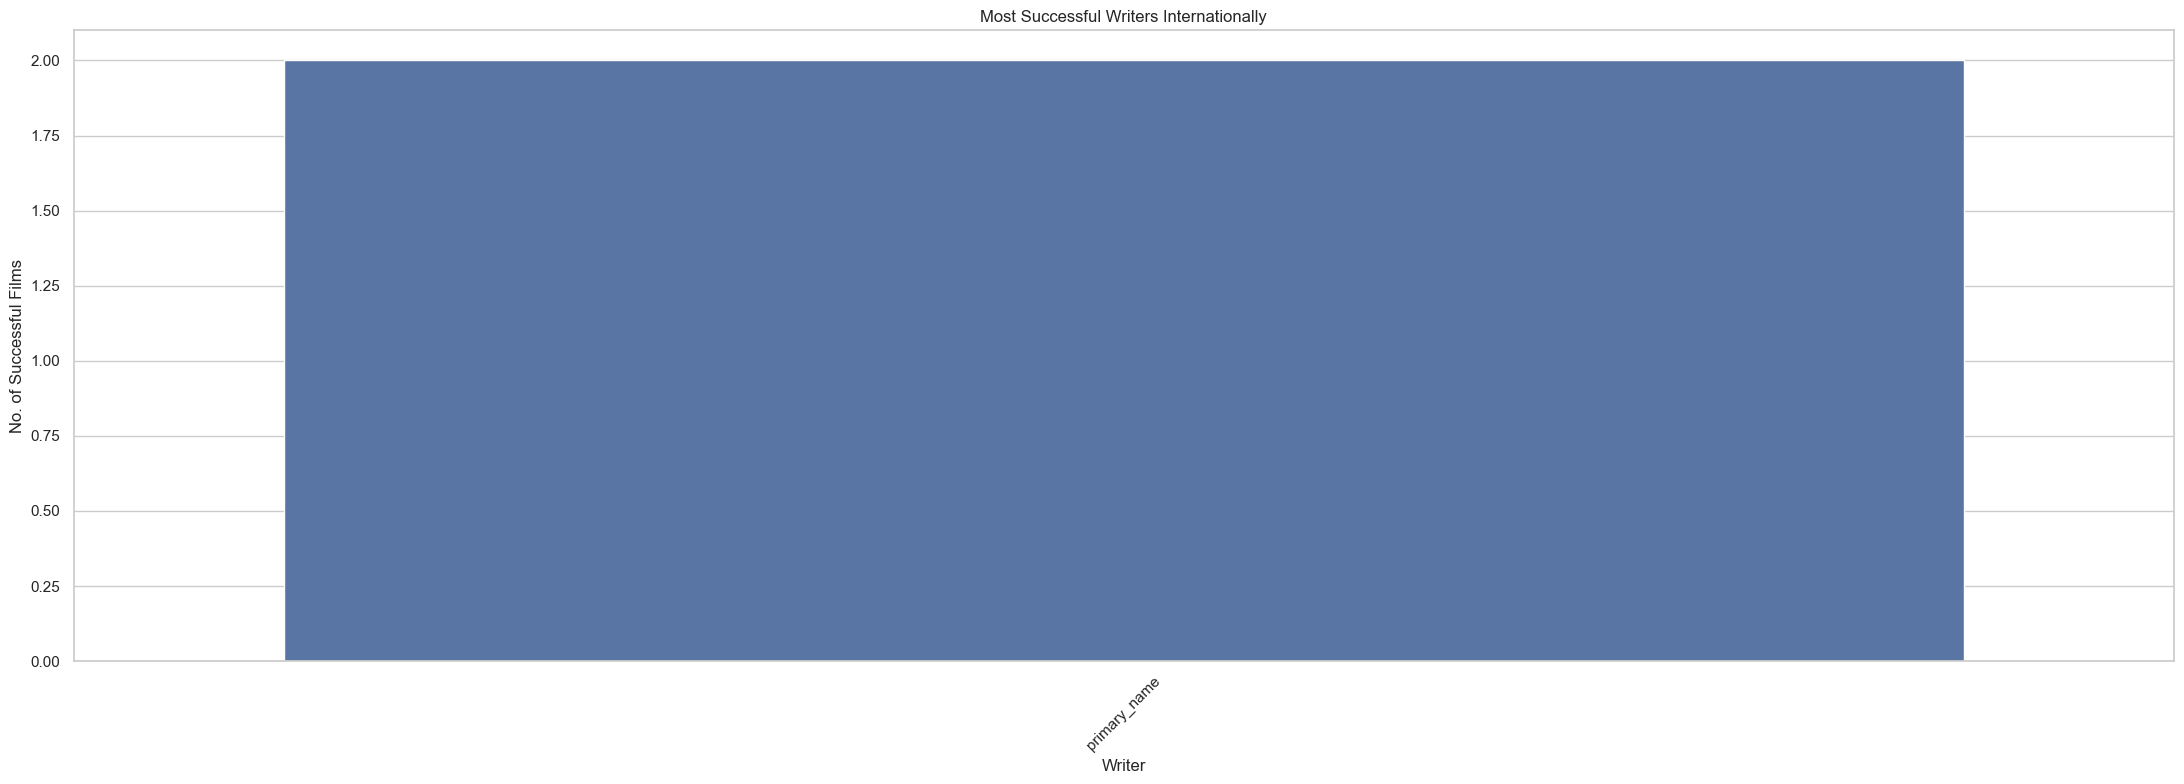

<Figure size 1200x800 with 0 Axes>

In [396]:
# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the directors in the low_budget_high_rev data
directors_list = list(popular_writers['primary_name'])

# converting the list to a dictionary that holds director's name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 efficient and successful directors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# plotting most succeful directors internationally
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Writers Internationally')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Writer')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../../images/writers.png', dpi= 100, bbox_inches= 'tight')

##### Conclusion
We identified that 'Larry Lieber', 'Christopher McQuarrie', 'John Logan', 'M. Night Shyamalan', 'Christopher Markus', 'Stephen McFeely', 'Michael Green', 'Christopher Nolan', 'Guillermo del Toro', 'Mark Bomback', 'Jane Goldman', 'Glenn Berger', 'Jonathan Aibel', 'Linda Woolverton', 'Michael Arndt', 'Darren Lemke', 'Ted Elliott', and 'Terry Rossio' are the most brilliant writers in the film industry. Most of their movies have appeared more than once in the highest revenue charts.

## Recommendation
After careful and thorough analysis, we have identified actors, directors, and writers that we strongly recommend that stakeholders consider hiring during and after the first phases of the business.

Choosing a film’s production crew is a crucial part of a movie studio, as this determines the company's end product.

### Actors
We identified 'Dwayne Johnson', 'Jennifer Lawrence', 'Johnny Depp', 'Bradley Cooper', 'Samuel L. Jackson', 'Robert Downey Jr.', 'Liam Neeson', 'Anne Hathaway', 'Tom Cruise', 'Ben Kingsley', 'Adam Sandler', 'Kevin James', 'Jamie Foxx', 'Kristen Wiig', 'Mark Wahlberg' 'Channing Tatum', 'Cate Blanchett', 'Chris Pratt', 'Cameron Diaz', and 'Owen Wilson', as the most popular actors and actresses in the film industry, having associated them with high earning films.

### Directors
The most successful directors according to high-performing films include 'Steven Spielberg', 'Mike Mitchell', 'M. Night Shyamalan', 'Ridley Scott', 'David Yates', 'Christopher Nolan', 'Tim Burton', 'David O. Russel', 'Zack Snyder', 'James Wan', 'Bryan Singer', 'Pierre Coffin', 'Chris Renaud', 'Todd Phillips', and 'Michael Bay'.

We strongly recommend that you hire 'M. Night Shyamalan' and 'Tim Burton'. These are some of the actors who've produced high-earning films with low budgets, therefore concluding that they are efficient in their work.

### Writers
We identified ‘'Larry Lieber', 'Christopher McQuarrie', 'John Logan', 'M. Night Shyamalan', 'Christopher Markus', 'Stephen McFeely', 'Michael Green', 'Christopher Nolan', 'Guillermo del Toro', 'Mark Bomback', 'Jane Goldman', 'Glenn Berger', 'Jonathan Aibel', 'Linda Woolverton', 'Michael Arndt', 'Darren Lemke', 'Ted Elliott', and 'Terry Rossio' as some of the most brilliant writers in the film industry. Most of their movies have appeared several times in the highest revenue charts.

### How will they push revenue?
As mentioned before, films are the end product of a company; film performance reflects highly on a movie studio. The above personnel will help push revenue and ultimately the company's brand by;

- Attracting Audience.

The star power of actors and directors is a major factor in attracting audiences to a film. A well-known actor or director can draw in viewers eager to see their work.

- Creating a Compelling Story.

The quality of the screenplay and the director's vision can significantly impact the film's appeal and box office success.

- Building Brand

A successful film can build a brand for the movie studio and the actors, directors, and writers, leading to future opportunities and higher earnings in subsequent projects.


# Genres with the highest revenues have what kind of budget range?

In [397]:
# Merge on primary_title_clean
df_merge_primary = pd.merge(
    movie_budgets,
    movie_basics[['movie_id', 'primary_title', 'genres', 'start_year']],
    left_on='movie',
    right_on='primary_title',
    how='inner'
)

In [398]:
# Find unmatched movies after primary_title merge
matched_movie_titles = df_merge_primary['movie'].unique()
df_csv_unmatched = movie_budgets[~movie_budgets['movie'].isin(matched_movie_titles)]

print(f"Number of unmatched movies after primary_title merge: {df_csv_unmatched.shape[0]}")

Number of unmatched movies after primary_title merge: 3322


In [399]:
# Merge unmatched movies with AKAS
df_merge_akas = pd.merge(
    df_csv_unmatched,
    movie_akas[['movie_id', 'title']],
    left_on='movie',
    right_on='title',
    how='inner'
)

# Bring in genres and start_year
df_merge_akas_full = pd.merge(
    df_merge_akas,
    movie_basics[['movie_id', 'genres', 'start_year']],
    on='movie_id',
    how='left'
)


# Concatenate both DataFrames
df_merged_combined = pd.concat([df_merge_primary, df_merge_akas_full], ignore_index=True)

# Drop duplicates based on 'movie'
df_merged_combined = df_merged_combined.drop_duplicates(subset='movie', keep='first')

# Show final merged result
print("\nFINAL Merged DataFrame shape:", df_merged_combined.shape)
print("\nSample merged data with genres:")
print(df_merged_combined[['movie', 'genres', 'production_budget($)', 'worldwide_gross($)']].head(5))


# Print unmatched movie titles:
csv_titles = set(movie_budgets['movie'].unique())
primary_titles = set(movie_basics['primary_title'].unique())
aka_titles = set(movie_akas['title'].unique())

total_db_titles = primary_titles.union(aka_titles)

unmatched_movies = csv_titles - total_db_titles
print(f"\nNumber of completely unmatched movies: {len(unmatched_movies)}")
if len(unmatched_movies) > 0:
    print("Example unmatched movies:", list(unmatched_movies)[:10])



FINAL Merged DataFrame shape: (2562, 11)

Sample merged data with genres:
                                        movie                    genres  \
0                                      avatar                    Horror   
1  pirates of the caribbean on stranger tides  Action,Adventure,Fantasy   
2                                dark phoenix   Action,Adventure,Sci-Fi   
3                      avengers age of ultron   Action,Adventure,Sci-Fi   
4                       avengers infinity war   Action,Adventure,Sci-Fi   

   production_budget($)  worldwide_gross($)  
0             425000000          2776345279  
1             410600000          1045663875  
2             350000000           149762350  
3             330600000          1403013963  
4             300000000          2048134200  

Number of completely unmatched movies: 3136
Example unmatched movies: ['old school', 'finding forrester', 'the quick and the dead', 'el crimen de padre amaro', 'the night listener', 'zombieland', '

In [400]:
df_merge_akas_full.head()

,id,release_date,movie,production_budget($),domestic_gross($),worldwide_gross($),movie_id,title,genres,start_year
0,19,2002-05-03,spiderman,139000000,403706375,821706375,tt1872181,spiderman,"Action,Adventure,Sci-Fi","2,014"
1,19,2002-05-03,spiderman,139000000,403706375,821706375,tt0948470,spiderman,"Action,Adventure,Sci-Fi","2,012"
2,83,2000-11-17,how the grinch stole christmas,123000000,260044825,345141403,tt2709692,how the grinch stole christmas,"Animation,Comedy,Family","2,018"
3,22,2015-03-20,the divergent series insurgent,110000000,130179072,295075882,tt2908446,the divergent series insurgent,"Action,Adventure,Sci-Fi","2,015"
4,22,2015-03-20,the divergent series insurgent,110000000,130179072,295075882,tt2908446,the divergent series insurgent,"Action,Adventure,Sci-Fi","2,015"


## ANALYSIS

In [401]:
pd.set_option('display.float_format', '{:,.0f}'.format)
# Basic statistics
print("\nProduction Budget stats:")
print(df_merged_combined['production_budget($)'].describe())

print("\nWorldwide Gross stats:")
print(df_merged_combined['worldwide_gross($)'].describe())



Production Budget stats:
count         2,562
mean     35,456,375
std      48,680,083
min           1,400
25%       5,000,000
50%      18,000,000
75%      43,000,000
max     425,000,000
Name: production_budget($), dtype: Float64

Worldwide Gross stats:
count           2,562
mean      105,446,759
std       205,626,188
min                 0
25%         2,482,391
50%        30,866,066
75%       108,027,756
max     2,776,345,279
Name: worldwide_gross($), dtype: Float64


# PROFITABLE GENRES

### Checking the ratio of worldwide gross and production budget

In [402]:
# Add gross-to-budget ratio
df_merged_combined['gross_to_budget_ratio'] = df_merged_combined['worldwide_gross($)'] / df_merged_combined['production_budget($)']


df_profitable = df_merged_combined[df_merged_combined['worldwide_gross($)'] > 0]

# Group by genre (explode multi-genre entries)
df_profitability = (
    df_profitable.dropna(subset=['genres', 'gross_to_budget_ratio'])
    .assign(genres=df_profitable['genres'].str.split(','))
    .explode('genres')
    .groupby('genres')
    .gross_to_budget_ratio.median().sort_values(ascending=False)
)

print("\nMedian gross-to-budget ratio per genre:")
print(df_profitability)



Median gross-to-budget ratio per genre:
genres
News          3
Animation     3
Horror        3
Mystery       3
Adventure     3
Sci-Fi        2
Comedy        2
Action        2
Romance       2
Thriller      2
Fantasy       2
Family        2
Music         2
Biography     2
Drama         2
Crime         2
Documentary   1
Sport         1
Western       1
History       1
Musical       1
War           1
Name: gross_to_budget_ratio, dtype: Float64


## Mean production budget, mean worldwide gross, mean profit per genre:

In [403]:
# Exclude rows with worldwide_gross == 0
df_profitable = df_merged_combined[df_merged_combined['worldwide_gross($)'] > 0]

# grouping
df_mean_budget_gross_profit = (
    df_profitable.dropna(subset=['genres', 'production_budget($)', 'worldwide_gross($)'])
    .assign(genres=df_profitable['genres'].str.split(','))
    .explode('genres')
    .groupby('genres')
    .agg(
        mean_production_budget=('production_budget($)', 'mean'),
        mean_worldwide_gross=('worldwide_gross($)', 'mean'),
        movie_count=('movie', 'count')
    )
)

# mean profit column
df_mean_budget_gross_profit['mean_profit'] = (df_mean_budget_gross_profit['mean_worldwide_gross']- df_mean_budget_gross_profit['mean_production_budget'])

# Sort by mean_profit descending
df_mean_budget_gross_profit = df_mean_budget_gross_profit.sort_values(by='mean_profit', ascending=False)

# Display the result
print("\nMean production budget, mean worldwide gross, mean profit per genre:")
print(df_mean_budget_gross_profit)



Mean production budget, mean worldwide gross, mean profit per genre:
             mean_production_budget  mean_worldwide_gross  movie_count  \
genres                                                                   
Animation                83,807,265           305,157,490          136   
Adventure                95,555,553           312,382,916          432   
Sci-Fi                   81,418,594           290,714,757          169   
Action                   73,350,115           216,820,098          549   
Fantasy                  76,006,091           207,216,918          154   
Family                   54,047,377           146,659,859          138   
Comedy                   36,648,513           117,316,726          697   
Thriller                 31,149,692            97,677,748          349   
Mystery                  25,157,577            88,347,289          163   
Horror                   20,419,340            73,779,473          253   
Musical                  31,026,471       

## PLOTTING

### Median Gross to Budget ratio per genre

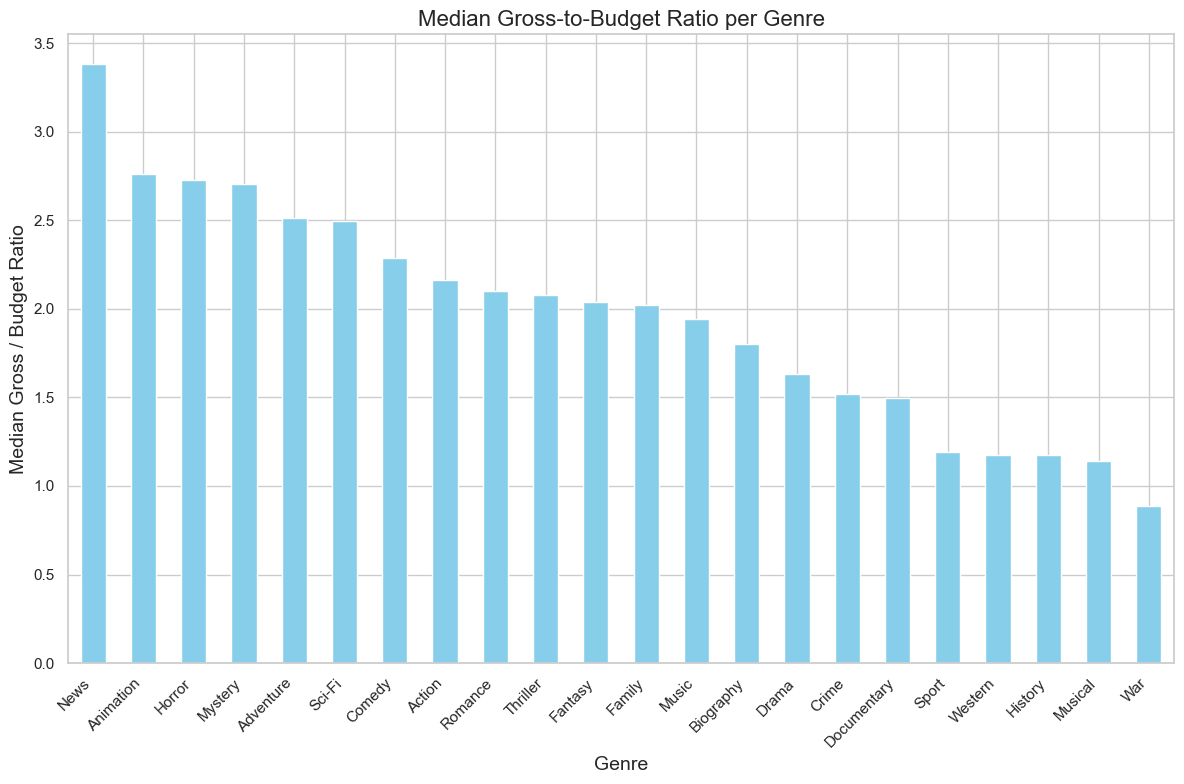

In [404]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (12, 8), 'axes.titlesize': 16, 'axes.labelsize': 14})

# -------- PLOT 1: Median Gross-to-Budget Ratio --------
plt.figure(figsize=(12, 8))
df_profitability.plot(kind='bar', color='skyblue')
plt.title('Median Gross-to-Budget Ratio per Genre')
plt.ylabel('Median Gross / Budget Ratio')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Mean Profit per genre

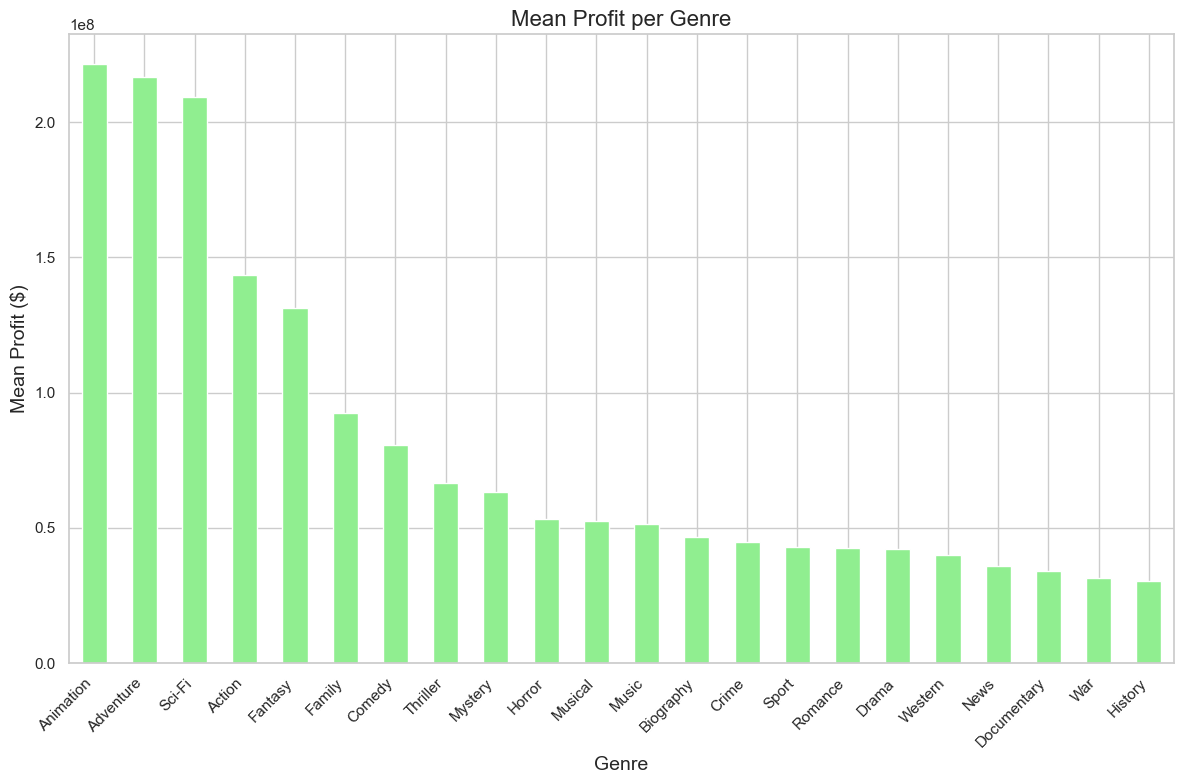

In [405]:
# -------- PLOT 2: Mean Profit per Genre --------
plt.figure(figsize=(12, 8))
df_mean_budget_gross_profit['mean_profit'].plot(kind='bar', color='lightgreen')
plt.title('Mean Profit per Genre')
plt.ylabel('Mean Profit ($)')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Mean budget vs Mean Gross per genre

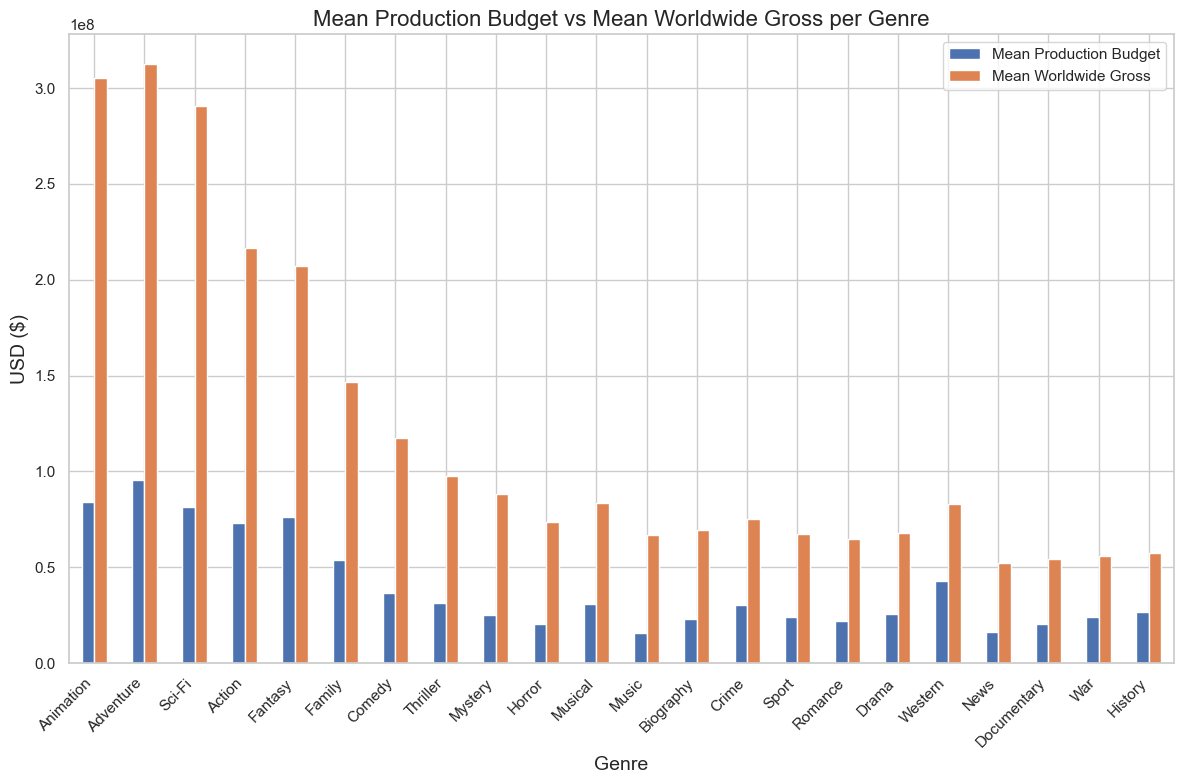

In [406]:
# -------- PLOT 3: Mean Budget vs Mean Gross per Genre --------
df_mean_budget_gross_profit[['mean_production_budget', 'mean_worldwide_gross']].plot(kind='bar', stacked=False)
plt.title('Mean Production Budget vs Mean Worldwide Gross per Genre')
plt.ylabel('USD ($)')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(['Mean Production Budget', 'Mean Worldwide Gross'])
plt.tight_layout()
plt.show()


## RECOMMENDATIONS

# 1.Focus on Highly Profitable Genres (High Gross-to-Budget Ratio)
## Genres with the best returns per dollar invested (based on your plots and df_profitability):
- Animation
- Horror
- Documentary
- Thriller

 **Why:**

### These genres often succeed even with lower budgets.

### They attract specific fan bases and perform well in international markets.

### Ideal for studios seeking lower-risk, scalable profits.

# 2. Balance High-Profit, High-Budget Genres
## Genres with high mean profits but also higher budgets:

 - Adventure
 - Action
 - Fantasy
 - Sci-Fi
**Why:**

### Big profits possible but require very large investments.
### Riskier: Not every blockbuster is successful.
### Suitable for well-funded studios or co-productions.
### Consider making only 1–2 blockbuster movies per year while balancing with smaller projects.

# Diversify Portfolio
## mix of:
## Genre Type	Purpose

- Animation / Horror / Documentary	Steady cash flow, less budget required
- Action / Adventure / Sci-Fi	Potential blockbuster, long-term brand building

**Don’t rely entirely on big-budget genres — diversify!**


                                         title studio  domestic_gross  \
0                                  toy story 3     BV     415,000,000   
1                     alice in wonderland 2010     BV     334,200,000   
2  harry potter and the deathly hallows part 1     WB     296,000,000   
3                                    inception     WB     292,600,000   
4                          shrek forever after   P/DW     238,700,000   

   foreign_gross  year  
0    652,000,000  2010  
1    691,300,000  2010  
2    664,300,000  2010  
3    535,700,000  2010  
4    513,900,000  2010  
Number of matched films: 1983
                                         title studio  domestic_gross  \
0                                  toy story 3     BV       415000000   
1  harry potter and the deathly hallows part 1     WB       296000000   
2                                    inception     WB       292600000   
3                          shrek forever after   P/DW       238700000   
4               

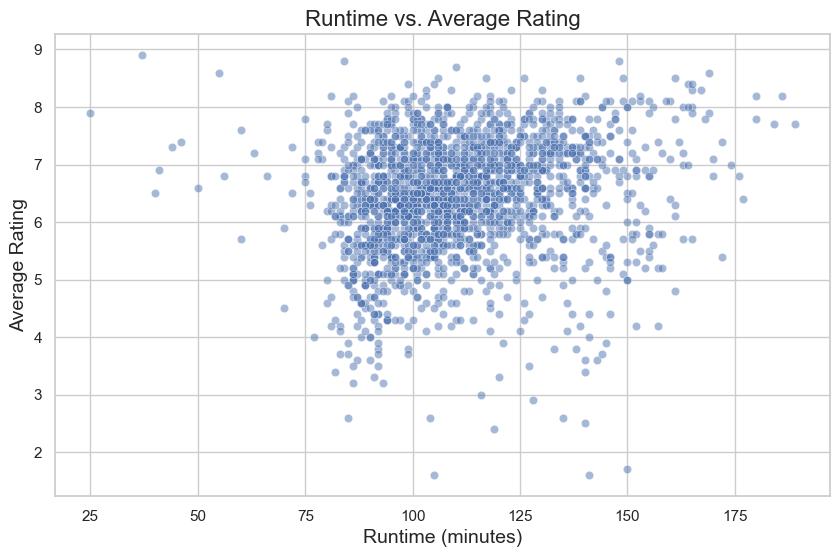

In [412]:
#import sqlite3
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
## LOAD THE DATASET
# Connect to SQLite database
#conn = sqlite3.connect('im.db')

#cur= conn.cursor()
#cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = cur.fetchall()
# for table in tables:
#     print(table[0])
# # List all tables in the database
# tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
# print(tables)

# df=pd.read_sql("SELECT * FROM sqlite_master WHERE type= 'table';",conn)
# df
# df = pd.read_sql("SELECT * FROM movie_basics LIMIT 10;", conn)
# print(df)
# cur.execute("PRAGMA table_info(movie_basics);")           #movie basics schema
# schema = cur.fetchall()
# print("Schema of movie_basics:")
# for col in schema:
#     print(col)
# query = "SELECT COUNT(*) AS total_movies FROM movie_basics;"    # total count movie basics
# df = pd.read_sql(query, conn)

# print(df)
# df = pd.read_sql("SELECT * FROM movie_basics;", conn)     

# # Count nulls per column
# null_counts = df.isnull().sum()

# print(null_counts)
# #movie ratings
# df = pd.read_sql("SELECT * FROM movie_ratings LIMIT 10;", conn)
# print(df)
# df_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)   #checking for null values
# print(df_ratings.isnull().sum())
# query = "SELECT COUNT(*)  FROM movie_ratings;"    # total count movie ratings
# df = pd.read_sql(query, conn)

#print(df)
#directors
# directors_df = pd.read_sql("SELECT * FROM directors LIMIT 5;", conn)
# print(directors_df)

# directors_df_nulls = pd.read_sql("SELECT * FROM directors;", conn)
# print(directors_df_nulls.isnull().sum())
# #persons
# persons_df = pd.read_sql("SELECT * FROM persons LIMIT 5;", conn)
# print(persons_df)
# full_persons = pd.read_sql("SELECT * FROM persons;", conn)

# # Check for null values in each column
# print(full_persons.isnull().sum())
# #known for
# known_for_df = pd.read_sql("SELECT * FROM known_for LIMIT 10;", conn)
# print(known_for_df)
# full_known_for = pd.read_sql("SELECT * FROM known_for;", conn)   #check for nulls
# print(full_known_for.isnull().sum())
# #movies akas
# df = pd.read_sql("SELECT * FROM movie_akas LIMIT 10;", conn)
# print(df)
# query = "SELECT * FROM movie_akas;"
# akas_df = pd.read_sql(query, conn)

# # Count nulls per column
# null_counts = akas_df.isnull().sum()
# print(null_counts)
# #writers
# df = pd.read_sql("SELECT * FROM writers LIMIT 10;", conn)
# print(df)
# query = "SELECT * FROM writers;"
# writers_df = pd.read_sql(query, conn)

# # Count nulls per column
# null_counts = writers_df.isnull().sum()
# print(null_counts)
# #principals
# df = pd.read_sql("SELECT * FROM principals LIMIT 10;", conn)
# print(df)
# query = "SELECT * FROM principals;"
# principals_df = pd.read_sql(query, conn)

# # Count nulls per column
# null_counts = principals_df.isnull().sum()
# print(null_counts)
# pd.read_sql("PRAGMA table_info(movie_ratings);", conn)
# # Load movie_basics
# movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# # Load movie_ratings
# movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# conn.close
movie_basics.head()
movie_ratings.tail()
## CHECK FOR NULLS AND DUPLICATES
movie_ratings.duplicated()
movie_basics.duplicated()
movie_ratings.isnull().sum(), movie_basics.isnull().sum()


# 1. Fill original_title with primary_title
movie_basics['original_title'] = movie_basics['original_title'].fillna(movie_basics['primary_title'])

# 2. Fill genres with "Unknown"
movie_basics['genres'] = movie_basics['genres'].fillna("Unknown")

# 3. Calculate median runtime per genre
# Only use rows where runtime is present
genre_medians = (
    movie_basics[movie_basics['runtime_minutes'].notnull()]
    .groupby('genres')['runtime_minutes']
    .median()
)

# Overall median for fallback
overall_median = movie_basics['runtime_minutes'].median()

# 4. Fill runtime_minutes based on genre median
def fill_runtime(row):
    if pd.isnull(row['runtime_minutes']):
        return genre_medians.get(row['genres'], overall_median)
    return row['runtime_minutes']

movie_basics['runtime_minutes'] = movie_basics.apply(fill_runtime, axis=1)

movie_basics.isnull().sum()
imdb = movie_basics.merge(movie_ratings, on="movie_id", how="left")
imdb.head()
## LOAD THE BOM.MOVIE DATASET
# Load compressed CSV
#bom = pd.read_csv("bom.movie_gross.csv.")

# Quick check
bom = movie_gross.copy()
print(bom.head())


bom.duplicated()
bom.isnull().sum()
# Fill missing studio with "Unknown"
bom['studio'] = bom['studio'].fillna("Unknown")

# Drop rows with missing domestic_gross (it's critical for performance analysis)
bom = bom.dropna(subset=["domestic_gross"])

bom['foreign_gross'] = bom['foreign_gross'].replace(r'[\$,]', '', regex=True)
bom['domestic_gross'] = bom['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(int)
bom['foreign_gross'] = bom['foreign_gross'].fillna(0).astype(float)
# Normalize title and year for joining with IMDB
bom['title'] = bom['title'].str.strip().str.lower()
bom['year'] = bom['year'].astype(int)

bom.isnull().sum()
imdb['title'] = imdb['primary_title'].str.strip().str.lower()
imdb['year'] = imdb['start_year'].astype(int)

## MERGE THE TWO DATASETS(IM.DB $ BOM)
merged_df = pd.merge(bom, imdb, how='inner', on=['title', 'year'])

print(f"Number of matched films: {len(merged_df)}")
print(merged_df.head())

merged_df.shape
## EXPLORE RELATIONSHIP BETWEEN RUNTIME AND RATING
#Explore the Relationship Between Runtime and Rating

import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: Runtime vs. Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="runtime_minutes", y="averagerating", alpha=0.5)
plt.title("Runtime vs. Average Rating")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

### Observations

Runtime Range Concentration: Most movies fall between 80 to 130 minutes.
This aligns with industry norms — typical feature films are in this range.

Average Rating Clustering: Ratings mostly cluster around 6.0 to 7.5.
There are few very low-rated (<4) or very high-rated (>8.5) films, indicating a bell curve in audience sentiment.

No Strong Correlation: There's no clear linear trend (e.g., longer films don’t obviously score higher or lower).
This suggests that runtime alone does not strongly determine whether a film is well-received.

### Conclusion
The "ideal runtime" in terms of audience satisfaction appears to be between 90–120 minutes, which is both:
where most films are made, and where the highest density of moderately to well-rated films sits.
Runtime is likely a secondary factor — storytelling, acting, direction matter more for ratings.

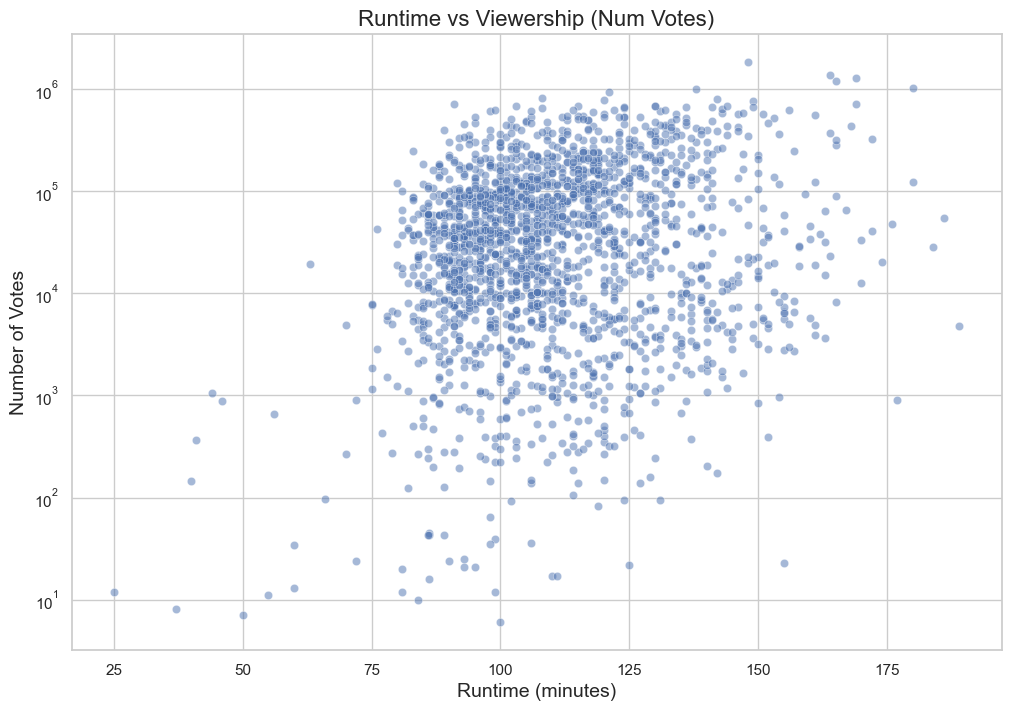

<Axes: xlabel='runtime_minutes', ylabel='numvotes'>

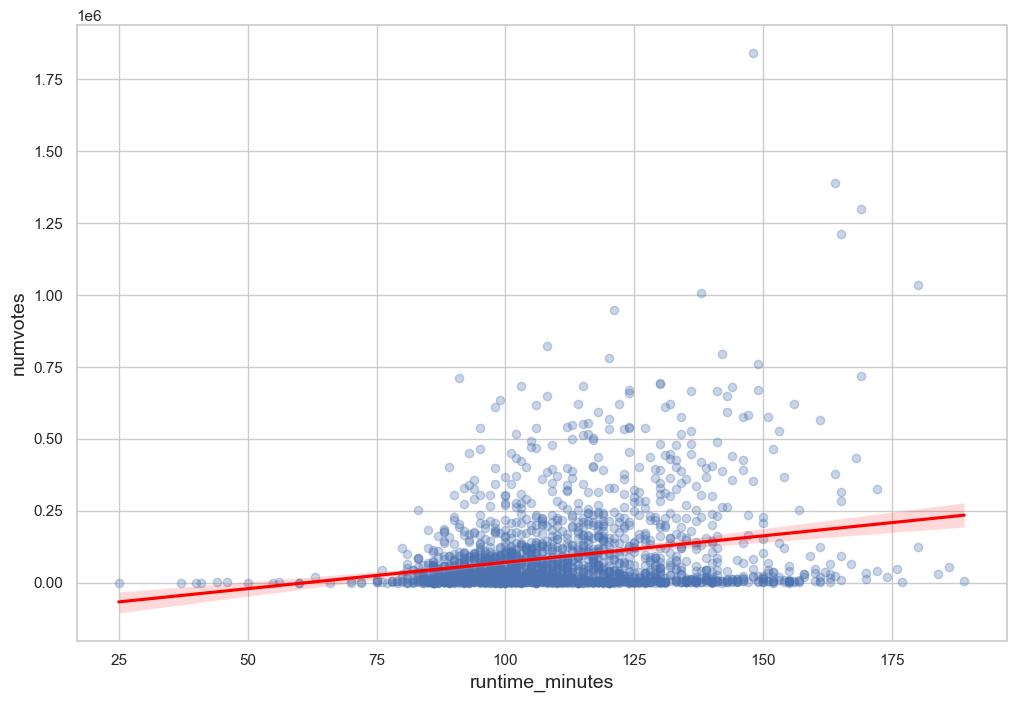

In [413]:
## RELATIONSHIP BETWEEN RUNTIME VS AUDIENCE ENGAGEMENT
#Runtime vs. Audience Engagement (numvotes)

sns.scatterplot(data=merged_df, x='runtime_minutes', y='numvotes', alpha=0.5)
plt.title("Runtime vs Viewership (Num Votes)")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Votes")
plt.yscale('log')  # log scale for better spread
plt.show()
sns.regplot(data=merged_df, x='runtime_minutes', y='numvotes', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

### Observations
Positive Correlation: The red line trends upward, indicating a weak but positive correlation between runtime and audience engagement.
In general, longer films tend to receive more votes, but the relationship is not strong or linear.

Cluster Range
The densest cluster of movies sits in the 80–130 minute range and gets up to ~500,000 votes.
This aligns with what we expect from mainstream films (e.g., accessible runtimes = higher audience).

High-Vote Outliers
A few long films (~150–180 minutes) received over 1 million votes — likely blockbuster hits (e.g., Inception, The Dark Knight Rises, etc.).


### Conclusion
Moderate to long runtimes (90–140 minutes) are positively associated with audience engagement.
Extremely short or excessively long movies tend to get less attention, unless they are exceptional in other ways.
For studios or producers: consider targeting runtimes within the 90–130 minute range for maximum reach and accessibility.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12192\1753787323.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_exploded.groupby(['genre', 'runtime_bin']).agg(
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

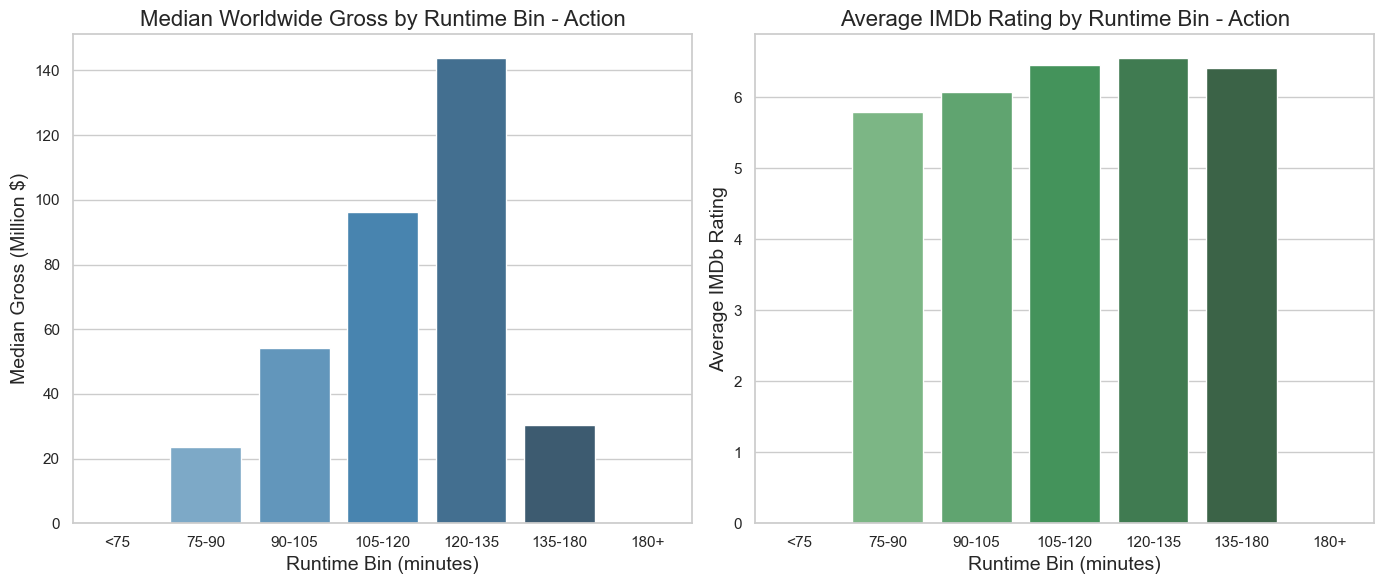

In [414]:
## WORLDWIDE GROSS BY RUNTIME AND RATINGS

# Create worldwide gross by summing domestic and foreign
merged_df['worldwide_gross'] = merged_df['domestic_gross'] + merged_df['foreign_gross']

# Convert worldwide gross to millions for easier scale
merged_df['worldwide_gross_m'] = merged_df['worldwide_gross'] / 1_000_000

# Explode genres to one row per genre for better analysis
merged_df['genre_list'] = merged_df['genres'].str.split(',')
df_exploded = merged_df.explode('genre_list').rename(columns={'genre_list': 'genre'})

# Filter out invalid or missing values
df_exploded = df_exploded.dropna(subset=['runtime_minutes', 'worldwide_gross_m', 'genre', 'averagerating', 'numvotes'])
df_exploded = df_exploded[(df_exploded['runtime_minutes'] > 0) & (df_exploded['worldwide_gross_m'] > 0)]

bins = [0, 75, 90, 105, 120, 135, 180, np.inf]
labels = ['<75', '75-90', '90-105', '105-120', '120-135', '135-180', '180+']
df_exploded['runtime_bin'] = pd.cut(df_exploded['runtime_minutes'], bins=bins, labels=labels)

stats = df_exploded.groupby(['genre', 'runtime_bin']).agg(
    median_gross_m=('worldwide_gross_m', 'median'),
    avg_rating=('averagerating', 'mean'),
    movie_count=('title', 'count')
).reset_index()

# Filter bins with at least 20 movies for reliability
stats_filtered = stats[stats['movie_count'] >= 20]

import seaborn as sns

def plot_genre_runtime(genre):
    data = stats_filtered[stats_filtered['genre'] == genre]
    if data.empty:
        print(f"No sufficient data for genre '{genre}'")
        return

    plt.figure(figsize=(14,6))

    plt.subplot(1, 2, 1)
    sns.barplot(x='runtime_bin', y='median_gross_m', data=data, palette='Blues_d')
    plt.title(f'Median Worldwide Gross by Runtime Bin - {genre}')
    plt.xlabel('Runtime Bin (minutes)')
    plt.ylabel('Median Gross (Million $)')

    plt.subplot(1, 2, 2)
    sns.barplot(x='runtime_bin', y='avg_rating', data=data, palette='Greens_d')
    plt.title(f'Average IMDb Rating by Runtime Bin - {genre}')
    plt.xlabel('Runtime Bin (minutes)')
    plt.ylabel('Average IMDb Rating')

    plt.tight_layout()
    plt.show()

# Example usage
plot_genre_runtime('Action')


### Observations
Runtime vs. Median Worldwide Gross (Left Plot)
Gross increases steadily from runtime bins 75–90 up to 120–135 minutes.
The 120–135 min bin has the highest median worldwide gross (~$130M).
There's a sharp drop in gross for 135–180 min, and no data for <75 and 180+ bins.

### Conclusion
For Action films, the ideal runtime for commercial success appears to be 120–135 minutes.
Films shorter than 90 minutes underperform financially, likely due to:
Limited theatrical appeal,perception of lower production value,or being non-blockbusters.
Very long action films (>135 minutes) might be too niche or less frequent, explaining the drop.

### Observations
Runtime vs. Average IMDb Rating (Right Plot)
IMDb ratings steadily rise from 75–90 to 120–135 minutes.
120–135 minutes has the highest average rating, slightly above 6.5.
Ratings slightly dip after 135 minutes, and again no data for <75 or 180+

### Conclusion
Audience reception is also strongest in the 105–135 min range.
Very short runtimes seem to correlate with lower ratings, likely due to:Less character development,rushed plots.

In [415]:
## CORRELATIONS
print(f"Correlation runtime vs worldwide gross (millions): {merged_df['runtime_minutes'].corr(merged_df['worldwide_gross_m']):.3f}")
print(f"Correlation runtime vs average rating: {merged_df['runtime_minutes'].corr(merged_df['averagerating']):.3f}")

# Correlation between runtime and engagement
print(f"Runtime vs Number of Votes: {merged_df['runtime_minutes'].corr(merged_df['numvotes']):.3f}")

correlation = merged_df[['runtime_minutes', 'averagerating', 'numvotes']].corr()

Correlation runtime vs worldwide gross (millions): 0.183
Correlation runtime vs average rating: 0.185
Runtime vs Number of Votes: 0.245


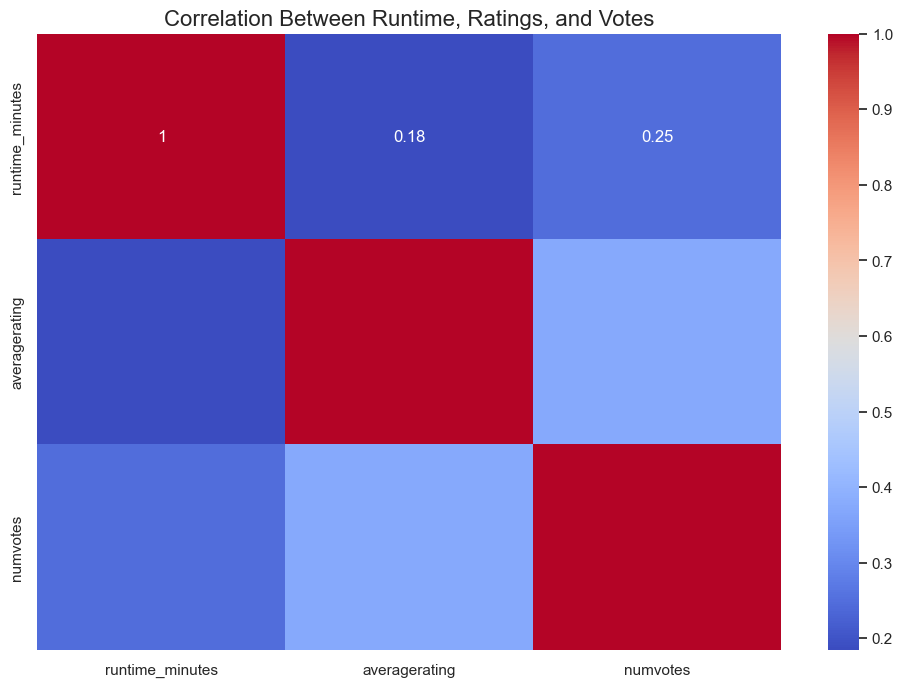

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Runtime, Ratings, and Votes")
plt.show()

### Observation

Diagonal (Self-Correlation):
The values of 1 on the main diagonal (e.g., runtime_minutes vs. runtime_minutes) simply indicate that a variable is perfectly correlated with itself, which is always true.

Runtime_minutes vs. averagerating (and vice-versa)
The correlation coefficient is 0.18. This represents a very weak positive linear correlation. It suggests that as a movie's runtime increases, its average rating tends to slightly increase, but the relationship is not strong or predictive.

Runtime_minutes vs. numvotes (and vice-versa):
The correlation coefficient is 0.25.This indicates a weak positive linear correlation. It implies that movies with longer runtimes tend to receive slightly more votes, but again, this relationship is not strong.

Averagerating vs. numvotes (and vice-versa):
The correlation coefficient is 0.38.This shows a weak to moderate positive linear correlation. This is the strongest relationship observed in the heatmap. It suggests that movies with higher average ratings tend to attract a greater number of votes, or that highly voted movies also tend to be rated higher on average.


C:\Users\Admin\AppData\Local\Temp\ipykernel_12192\1605978279.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_stats = df_exploded.groupby('runtime_bin').agg({
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

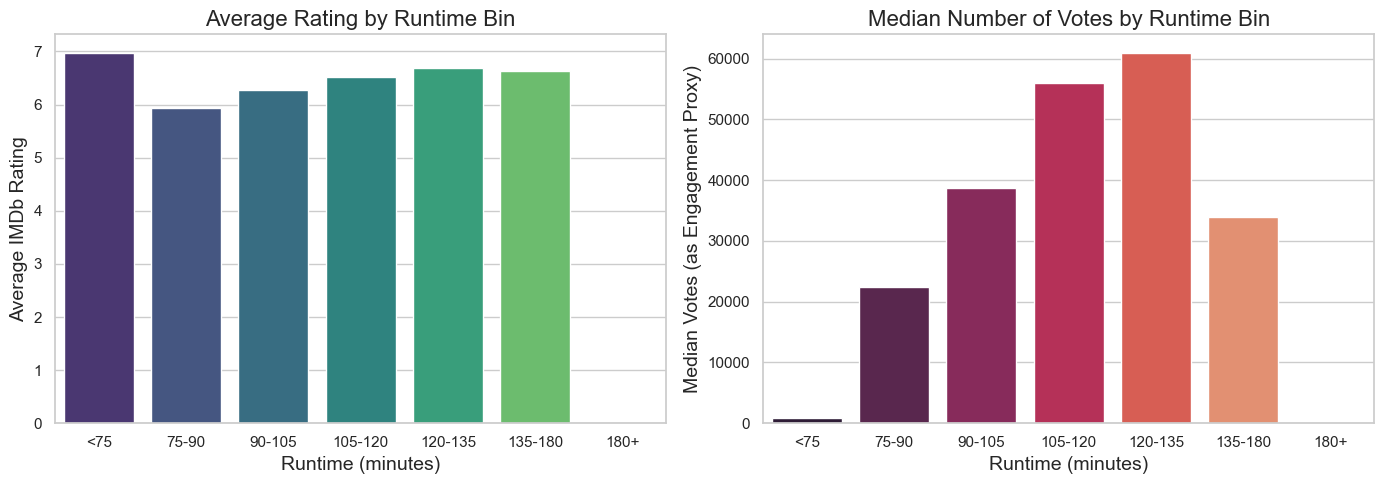

In [417]:

## AVERAGE RATING BY RUNTIME BIN
# Use previously defined bins
df_exploded['runtime_bin'] = pd.cut(df_exploded['runtime_minutes'], bins=[0, 75, 90, 105, 120, 135, 180, float('inf')],
                                    labels=['<75', '75-90', '90-105', '105-120', '120-135', '135-180', '180+'])

# Group by bin
engagement_stats = df_exploded.groupby('runtime_bin').agg({
    'averagerating': 'mean',
    'numvotes': 'median',
    'title': 'count'
}).rename(columns={'title': 'film_count'}).reset_index()

# Filter for bins with enough data
engagement_stats = engagement_stats[engagement_stats['film_count'] >= 20]

# Plot average rating by runtime bin
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=engagement_stats, x='runtime_bin', y='averagerating', palette='viridis')
plt.title('Average Rating by Runtime Bin')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average IMDb Rating')

# Plot median number of votes by runtime bin
plt.subplot(1, 2, 2)
sns.barplot(data=engagement_stats, x='runtime_bin', y='numvotes', palette='rocket')
plt.title('Median Number of Votes by Runtime Bin')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Median Votes (as Engagement Proxy)')

plt.tight_layout()
plt.show()



### Observation
CHART 1
Shortest Films (<75 minutes): Films less than 75 minutes have the highest average IMDb rating, approaching 7.0.
Very Long Films (180+ minutes):Maintain a relatively high average rating, comparable to the 120-135 and 135-180 minute bins, slightly above 6.5.
Mid-Range Drop:Noticeable drop in average rating for films between 75 and 105 minutes, with the 75-90 minute bin having the lowest average rating (around 6.0).
Trend: Beyond the shortest films, there's a general increasing trend in average rating as runtime increases, from 75-90 minutes up to 135-180 minutes, before dipping slightly for films 180+ minutes (though still higher than the 75-105 range).

### Conclusion 
 Longer films (especially those over 120 minutes) tend to receive slightly higher average ratings, but the very shortest films (<75 min) surprisingly lead the pack in average rating. This suggests that while there might be a preference for longer, more immersive cinematic experiences among critics/audiences who rate films, very short films might also be niche or highly impactful, leading to higher average scores. The mid-range films seem to struggle slightly in terms of average rating.

CHART 2
Very Short Films (<75 minutes): These films receive a very low median number of votes, barely registering on the scale. This suggests very low audience engagement or viewership for these shorter films.
Increasing Engagement with Runtime: As runtime increases, the median number of votes also dramatically increases up to the 120-135 minute bin.
Decline for Very Long Films: After peaking at 120-135 minutes, the median number of votes drops significantly for 135-180 minutes (around 36,000 votes) and falls even further for 180+ minute films (close to 0 on this scale, similar to <75 min films).

Conclusion
There's a clear sweet spot for audience engagement (number of votes) between approximately 105 and 135 minutes (or 110-130 minutes if you look at the top two bars). Films shorter than 75 minutes or longer than 135-180 minutes receive significantly fewer votes, indicating lower viewership or overall audience engagement. This suggests that the majority of viewers, and thus potential voters, are drawn to films within that optimal runtime window.


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


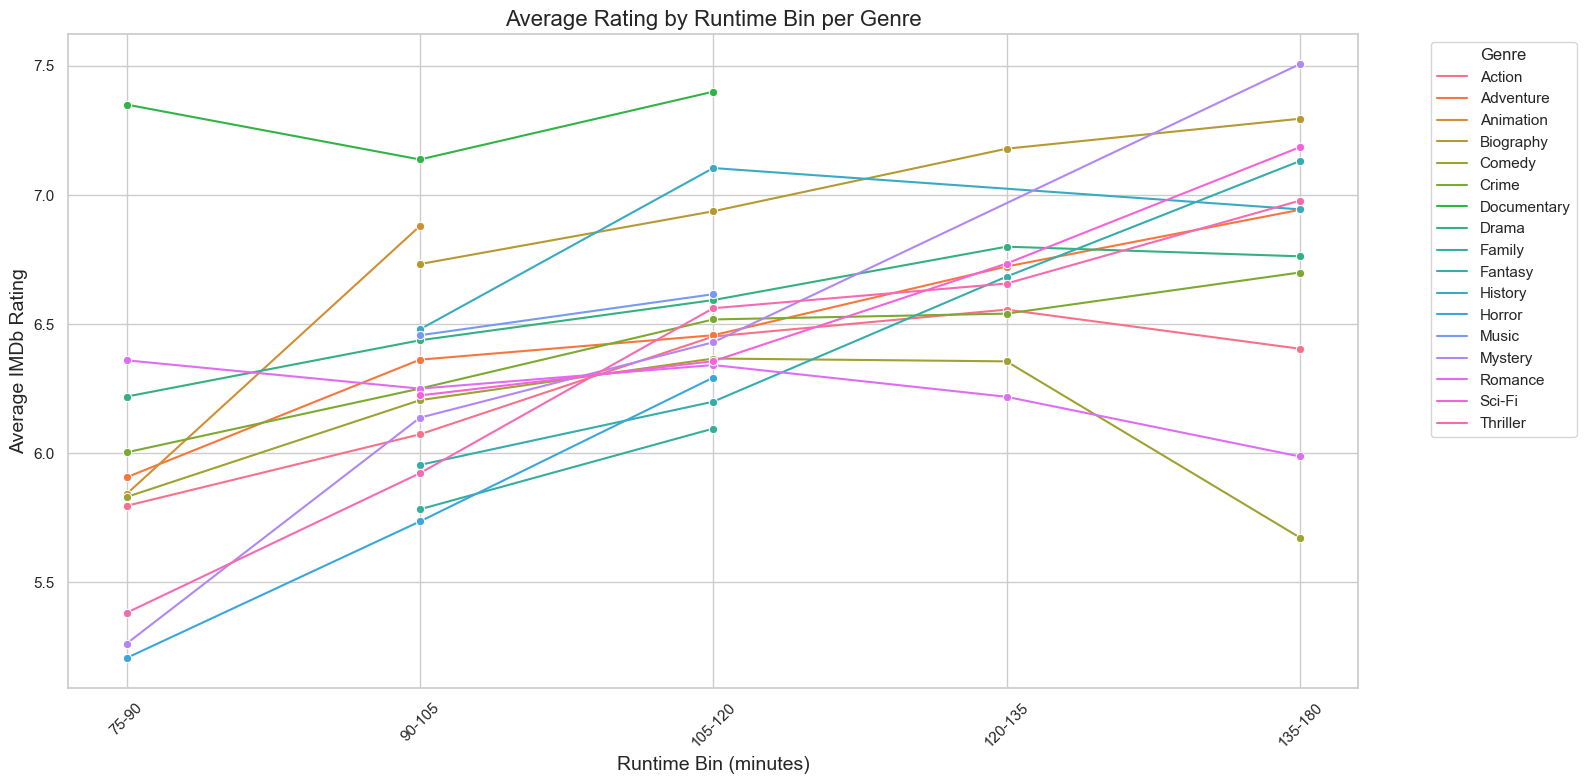

In [418]:

## GENRE SPECIFIC ENGAGEMENT
# Genre Specific engagement
genre_engagement = df_exploded.groupby(['genre', 'runtime_bin'], observed=True).agg({
    'averagerating': 'mean',
    'numvotes': 'median',
    'title': 'count'
}).reset_index()

# Filter for bins with enough data
genre_engagement = genre_engagement[genre_engagement['title'] >= 15]


# Filter for genres with enough data
filtered = genre_engagement[genre_engagement['title'] >= 15]

plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered, x='runtime_bin', y='averagerating', hue='genre', marker='o')

plt.title('Average Rating by Runtime Bin per Genre')
plt.xlabel('Runtime Bin (minutes)')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Observation
This plot clearly demonstrates that the "ideal" runtime for maximizing average rating varies significantly by genre.
For Drama, Horror, Mystery, Action, Comedy, and Sci-Fi, longer runtimes (up to 135-180 minutes) generally correlate with higher average ratings.
For Documentary, a wider range of longer runtimes (75-135 minutes) seems to maintain high ratings.
For Music, very long runtimes might lead to diminishing returns in terms of average rating.
plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered, x='runtime_bin', y='numvotes', hue='genre', marker='o', palette='tab10')

plt.title('Median Number of Votes by Runtime Bin per Genre')
plt.xlabel('Runtime Bin (minutes)')
plt.ylabel('Median Number of Votes (Engagement Proxy)')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Observation
Audience Engagement is Genre-Specific: 
The "ideal runtime" for maximizing audience engagement (votes) is even more genre-dependent than for ratings.
Longer Runtimes for Blockbuster Genres: For genres like Sci-Fi, Action, Adventure, Fantasy, and Crime, longer runtimes (especially 105-135 minutes, and for Sci-Fi, even 135-180 minutes) are strongly associated with significantly higher audience engagement. This suggests that complex plots, extensive world-building, or prolonged action sequences in these genres are well-received and lead to broader viewership.

In [419]:
## REGRESSION ANALYSIS
import statsmodels.api as sm

# Drop missing values 
df_clean = merged_df.dropna(subset=['runtime_minutes', 'averagerating', 'numvotes'])

# Set up the regression
X = df_clean['runtime_minutes']
y = df_clean['averagerating']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
#Summary of regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averagerating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     69.12
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           1.71e-16
Time:                        12:19:12   Log-Likelihood:                -2742.2
No. Observations:                1956   AIC:                             5488.
Df Residuals:                    1954   BIC:                             5500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.3906      0.126     

### Observation
There is a small but statistically significant positive relationship between runtime and audience rating.
But runtime alone explains very little of what affects IMDb ratings.